In [2]:
!pip install tensorflow==2.4.1 opencv-python matplotlib

ERROR: tensorboard 2.12.0 has requirement grpcio>=1.48.2, but you'll have grpcio 1.32.0 which is incompatible.



  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0


In [3]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [4]:
interpreter = tf.lite.Interpreter(model_path='lite-model_movenet_singlepose_lightning_3.tflite')
interpreter.allocate_tensors()

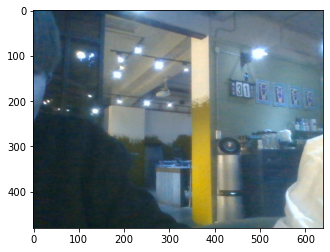

In [12]:
plt.imshow(tf.cast(np.squeeze(img), dtype=tf.int32))

In [7]:
img = tf.image.resize_with_pad(np.expand_dims(img, axis=0), 192, 192)

In [11]:
img = frame.copy()

In [13]:
img.shape

(480, 640, 3)

In [14]:
interpreter.get_output_details()

[{'name': 'StatefulPartitionedCall:0',
  'index': 312,
  'shape': array([ 1,  1, 17,  3]),
  'shape_signature': array([ 1,  1, 17,  3]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [39]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
        
    # Reshape image
    img = frame.copy()
    img = tf.image.resize_with_pad(np.expand_dims(img, axis=0), 192,192)
    input_image = tf.cast(img, dtype=tf.float32)
    
    # Setup input and output 
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    # Make predictions 
    interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
    interpreter.invoke()
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    print(keypoints_with_scores)
    
    # Rendering 
    draw_connections(frame, keypoints_with_scores, EDGES, 0.4)
    draw_keypoints(frame, keypoints_with_scores, 0.4)
    
    
    cv2.imshow('MoveNet Lightning', frame)
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

[[[[0.15930597 0.6567333  0.6977456 ]
   [0.12565914 0.69154304 0.42137814]
   [0.12445891 0.61954486 0.3925983 ]
   [0.14805147 0.75557613 0.57663244]
   [0.15142673 0.5631669  0.59406805]
   [0.37439093 0.88392323 0.38282692]
   [0.3666235  0.43844327 0.7516346 ]
   [0.6139054  0.9673411  0.13194081]
   [0.6796615  0.3416878  0.643004  ]
   [0.48452255 0.80448383 0.11089578]
   [0.84227365 0.27879265 0.2313726 ]
   [0.85411346 0.8407401  0.06570974]
   [0.86064565 0.52346516 0.13277188]
   [0.70310354 0.9590857  0.0278585 ]
   [0.8071495  0.3029812  0.08829632]
   [0.850039   0.7869     0.02450067]
   [0.8478823  0.2578211  0.08337426]]]]
[[[[0.15920013 0.65558183 0.6722851 ]
   [0.11872332 0.69096893 0.4852031 ]
   [0.11946583 0.61479485 0.578379  ]
   [0.14480658 0.75962687 0.5260891 ]
   [0.14480968 0.55991626 0.57733583]
   [0.37492824 0.89856356 0.4304145 ]
   [0.36488292 0.42667514 0.80353796]
   [0.6565793  0.9741196  0.13683984]
   [0.69439715 0.3212337  0.45038214]
   [0.463

[[[[0.16778915 0.5893858  0.36983573]
   [0.15116751 0.6266397  0.30712983]
   [0.1558291  0.5300647  0.3177688 ]
   [0.15645674 0.67082995 0.24638069]
   [0.16530812 0.47359058 0.3648507 ]
   [0.34163305 0.7578449  0.25431478]
   [0.33091345 0.3751683  0.64304227]
   [0.6805098  0.91245985 0.34340852]
   [0.6356864  0.26162225 0.47625133]
   [0.48781046 0.7297608  0.2778239 ]
   [0.8036415  0.22408961 0.12357229]
   [0.86708945 0.71838635 0.11104277]
   [0.8608115  0.4465253  0.13240805]
   [0.856075   0.6562769  0.012775  ]
   [0.873866   0.37562343 0.00748265]
   [1.0118668  0.51643646 0.00821283]
   [1.0126383  0.4208561  0.0066638 ]]]]
[[[[0.16340674 0.6198267  0.3911901 ]
   [0.13498747 0.65337074 0.44612926]
   [0.13633786 0.5891627  0.42646742]
   [0.15308246 0.69535506 0.47525427]
   [0.14929771 0.52149534 0.38023895]
   [0.33733588 0.78207624 0.36795872]
   [0.31897628 0.39722714 0.8093015 ]
   [0.6563718  0.91606086 0.35123956]
   [0.63820595 0.26765054 0.5132859 ]
   [0.471

[[[[0.19341859 0.6761513  0.399822  ]
   [0.1767677  0.712362   0.2707482 ]
   [0.16255738 0.623757   0.4143777 ]
   [0.2020154  0.7955327  0.384868  ]
   [0.16789798 0.50531787 0.35317236]
   [0.3731254  0.8414438  0.44804117]
   [0.3607889  0.37629315 0.7140216 ]
   [0.66279113 0.82471323 0.15628499]
   [0.7656092  0.29628327 0.3889213 ]
   [0.43102664 0.613063   0.10846281]
   [0.4996544  0.51548374 0.01968202]
   [0.8652753  0.7704748  0.07362136]
   [0.8606005  0.46606112 0.04260764]
   [0.7025211  0.85004777 0.00991896]
   [0.7864628  0.26650372 0.02476919]
   [0.8420412  0.8913406  0.02649024]
   [0.7156777  0.5822762  0.00310129]]]]
[[[[0.18134853 0.64414936 0.41519007]
   [0.14654341 0.67495775 0.35962623]
   [0.14600164 0.60073644 0.33857158]
   [0.16975366 0.7408039  0.37663674]
   [0.1576235  0.5068983  0.49099246]
   [0.3663054  0.8232121  0.47816527]
   [0.35712284 0.36186764 0.8068291 ]
   [0.72547734 0.85025275 0.27953318]
   [0.7195386  0.2855026  0.24597266]
   [0.678

[[[[0.41998062 0.6015852  0.49490273]
   [0.3845273  0.6467726  0.7742265 ]
   [0.38263175 0.56080836 0.6097717 ]
   [0.43485722 0.7036346  0.71560955]
   [0.43622023 0.5049287  0.70618284]
   [0.6416054  0.83127606 0.71655357]
   [0.65903974 0.34628844 0.7999842 ]
   [0.8803784  0.88916296 0.05875683]
   [0.8512487  0.27330688 0.04645026]
   [0.6691813  0.812451   0.00736371]
   [0.6740974  0.43210095 0.0071384 ]
   [1.0103848  0.7863393  0.00927776]
   [0.30195987 0.4621559  0.01936722]
   [0.6598629  0.8541874  0.01737264]
   [0.6439887  0.44914696 0.01528236]
   [0.46535215 0.99705315 0.01940581]
   [0.46518254 0.9909219  0.01102319]]]]
[[[[0.4384691  0.60594785 0.60373783]
   [0.4069991  0.64295375 0.6584264 ]
   [0.40797633 0.564757   0.7209196 ]
   [0.45424086 0.69394803 0.6713222 ]
   [0.46221125 0.5115931  0.7911005 ]
   [0.6585732  0.8290918  0.6195723 ]
   [0.6663574  0.3668676  0.6952497 ]
   [0.8637332  0.88621485 0.06228897]
   [0.8605818  0.2928407  0.04855928]
   [0.692

[[[[0.60008323 0.5704787  0.18615258]
   [0.55877465 0.5720997  0.3126879 ]
   [0.5604855  0.5521041  0.2992273 ]
   [0.6021712  0.58614683 0.1626806 ]
   [0.6109816  0.52760947 0.27561975]
   [0.6701621  0.6115637  0.14395893]
   [0.6858847  0.5159699  0.25710776]
   [0.7231306  0.7285697  0.13053477]
   [0.7456732  0.4767806  0.1901429 ]
   [0.69948053 0.70630306 0.11945453]
   [0.6859707  0.5378476  0.15877643]
   [0.75356376 0.64934576 0.06981465]
   [0.7560425  0.5893836  0.06937912]
   [0.6387871  0.68410397 0.07037178]
   [0.63310176 0.5339994  0.17122975]
   [0.6807005  0.72177047 0.08629081]
   [0.6874341  0.69202757 0.04845652]]]]
[[[[0.55880326 0.5806308  0.328351  ]
   [0.52806926 0.6089449  0.34311354]
   [0.52220094 0.55038357 0.21457586]
   [0.5669093  0.66569227 0.25513166]
   [0.5350486  0.5033959  0.34129792]
   [0.69647187 0.7183041  0.3800764 ]
   [0.6911807  0.42139482 0.4272021 ]
   [0.8594403  0.8170742  0.08516252]
   [0.8442721  0.33376426 0.30824465]
   [0.740

[[[[0.5261327  0.56476945 0.4571362 ]
   [0.48265398 0.6045598  0.26236486]
   [0.4835633  0.52320886 0.4831905 ]
   [0.50071585 0.6696421  0.42573845]
   [0.50106204 0.46671158 0.6292592 ]
   [0.7034297  0.78191155 0.3928551 ]
   [0.7124989  0.3398493  0.6880102 ]
   [0.88533777 0.8842318  0.06157577]
   [0.8807015  0.27330694 0.08144164]
   [0.7952193  0.77155274 0.09078476]
   [0.83792734 0.39470458 0.14492345]
   [1.0035865  0.7010535  0.02075833]
   [0.9896016  0.44298977 0.01245388]
   [0.8429967  0.8743299  0.01655555]
   [0.78254116 0.43235105 0.01582718]
   [0.8391248  0.9046135  0.01943552]
   [0.8301746  0.40807956 0.01876962]]]]
[[[[0.52088284 0.5622893  0.45775193]
   [0.4857641  0.58534735 0.4525025 ]
   [0.48823643 0.5216075  0.47570434]
   [0.506105   0.62724257 0.44271863]
   [0.51161605 0.4682631  0.73534495]
   [0.69237274 0.74933857 0.5108143 ]
   [0.7100913  0.35166532 0.6237295 ]
   [0.8788922  0.8562824  0.08194003]
   [0.8940853  0.27128145 0.13772997]
   [0.789

[[[[0.5213948  0.50402415 0.56403416]
   [0.47166225 0.5334668  0.7456452 ]
   [0.47572324 0.448808   0.63264513]
   [0.49108428 0.574247   0.5950057 ]
   [0.51285416 0.38450575 0.7679012 ]
   [0.7231698  0.7537441  0.5784522 ]
   [0.7547749  0.26639456 0.8321485 ]
   [0.8569169  0.8279619  0.0277549 ]
   [0.8667385  0.2055953  0.0458205 ]
   [0.746595   0.6681411  0.03195179]
   [0.8493284  0.36848864 0.05780101]
   [1.0144489  0.657986   0.01288804]
   [1.012567   0.35389    0.00769341]
   [0.7980923  0.8351551  0.007864  ]
   [0.8100454  0.34316814 0.02459294]
   [0.7786109  0.82781935 0.00372225]
   [0.7510187  0.5161793  0.00427884]]]]
[[[[0.52162004 0.5052125  0.64329183]
   [0.47231203 0.53369915 0.7301045 ]
   [0.47647056 0.44991946 0.6333273 ]
   [0.49079436 0.5711139  0.60045266]
   [0.5135497  0.38361797 0.7652815 ]
   [0.7195395  0.73533106 0.43814108]
   [0.7576849  0.26421323 0.82748497]
   [0.8648484  0.813354   0.02367038]
   [0.9530708  0.18374914 0.04310393]
   [0.767

[[[[0.5248035  0.48436117 0.6751344 ]
   [0.4763907  0.5173247  0.6452541 ]
   [0.48246866 0.43660054 0.40431434]
   [0.49106705 0.5636305  0.5694477 ]
   [0.5144373  0.37249047 0.77464205]
   [0.6912044  0.7216437  0.42825273]
   [0.756147   0.26003996 0.74739313]
   [0.8794014  0.8522131  0.07327038]
   [0.9340544  0.22760522 0.030534  ]
   [0.77210414 0.6840811  0.21445477]
   [0.8441032  0.39242017 0.07568535]
   [1.016158   0.6465516  0.00864699]
   [1.0093182  0.4247086  0.00321043]
   [0.85354537 0.8588505  0.03377232]
   [0.8227916  0.3433003  0.01956931]
   [0.83155483 0.8637623  0.01345587]
   [0.81750983 0.49800223 0.01038936]]]]
[[[[0.52381635 0.47998178 0.6466035 ]
   [0.47562665 0.5072572  0.66592574]
   [0.48153806 0.43170008 0.6427542 ]
   [0.49122602 0.5467953  0.6143167 ]
   [0.51658124 0.37106475 0.76617837]
   [0.68779933 0.7116489  0.5421582 ]
   [0.75378704 0.26454043 0.7532036 ]
   [0.8700639  0.8454114  0.14597422]
   [0.9367838  0.20267873 0.03405097]
   [0.780

[[[[0.5098129  0.46553895 0.6019815 ]
   [0.47674942 0.4924384  0.38280976]
   [0.48354596 0.42941698 0.51578027]
   [0.48982024 0.53856057 0.48388124]
   [0.50757015 0.3837679  0.7412727 ]
   [0.63585603 0.6286157  0.46808422]
   [0.6761714  0.35495394 0.40911102]
   [0.8130449  0.6758231  0.12505561]
   [0.8409916  0.24180537 0.174079  ]
   [0.7357615  0.6211966  0.32101673]
   [0.7614137  0.4422623  0.23444203]
   [0.9074198  0.58198977 0.04565209]
   [0.9168631  0.42668992 0.02091342]
   [0.8462149  0.6729281  0.01570305]
   [0.82536983 0.23491532 0.08164158]
   [0.78417027 0.5997307  0.02440566]
   [0.78054947 0.49148107 0.02469829]]]]
[[[[0.5142192  0.46513888 0.57885396]
   [0.48256382 0.4922181  0.4381772 ]
   [0.4894551  0.42898366 0.55406183]
   [0.4942296  0.5472052  0.5018537 ]
   [0.50724393 0.38475844 0.67767805]
   [0.63107747 0.6162693  0.49945152]
   [0.65756667 0.36617464 0.47223637]
   [0.8049156  0.6740033  0.10197383]
   [0.8230731  0.31888926 0.09042272]
   [0.748

[[[[0.49981806 0.42332205 0.36529842]
   [0.4768412  0.4421891  0.3503065 ]
   [0.47546554 0.40415496 0.35641363]
   [0.49047267 0.4860807  0.29020083]
   [0.49064133 0.3867273  0.21449411]
   [0.6039775  0.52841413 0.24557444]
   [0.603541   0.38962984 0.31730625]
   [0.76846284 0.6233729  0.22389603]
   [0.73484623 0.37018192 0.17656887]
   [0.7160892  0.47269434 0.17211136]
   [0.7163994  0.40272495 0.12596953]
   [0.70989454 0.52094936 0.04429743]
   [0.7003123  0.41191086 0.0762693 ]
   [0.771985   0.47963774 0.08653703]
   [0.73301953 0.35965464 0.15463299]
   [0.81314576 0.48147088 0.04408738]
   [0.74535656 0.3974772  0.09942302]]]]
[[[[0.47221133 0.43093747 0.37620598]
   [0.46220624 0.44398114 0.36875814]
   [0.46273977 0.4188852  0.38200212]
   [0.44167587 0.47960526 0.38653222]
   [0.44608828 0.4057805  0.26759082]
   [0.48183864 0.49834776 0.22223422]
   [0.48169863 0.39106008 0.32473564]
   [0.49810058 0.5196918  0.09459263]
   [0.48914    0.38076276 0.30600077]
   [0.534

[[[[0.51352084 0.4525287  0.526226  ]
   [0.4823689  0.48043942 0.40958723]
   [0.48726398 0.4166991  0.5515672 ]
   [0.50481105 0.52441704 0.35918623]
   [0.5118615  0.36483657 0.7444489 ]
   [0.65729064 0.5851564  0.44729367]
   [0.66837066 0.31864265 0.38948995]
   [0.84025633 0.62900776 0.09575921]
   [0.833897   0.27667388 0.10463437]
   [0.7654458  0.49769264 0.28818768]
   [0.77013254 0.37083182 0.12285998]
   [0.9199902  0.5326854  0.02314785]
   [0.9878963  0.30760247 0.03455752]
   [0.8325528  0.6314219  0.02075252]
   [0.84115404 0.31889594 0.01299319]
   [0.778763   0.5074811  0.03495792]
   [0.78175086 0.35674077 0.0183098 ]]]]
[[[[0.5204259  0.44918665 0.475092  ]
   [0.4809118  0.47906464 0.43092147]
   [0.48858297 0.40727255 0.6215155 ]
   [0.4934947  0.5225077  0.4892535 ]
   [0.51232207 0.36231303 0.77289116]
   [0.66011214 0.6010051  0.5449345 ]
   [0.67696613 0.30794024 0.75296366]
   [0.82957125 0.6387111  0.15207651]
   [0.83930963 0.28128025 0.11359727]
   [0.757

[[[[0.34746414 0.52526915 0.58884764]
   [0.2719034  0.56795484 0.6256304 ]
   [0.2769766  0.468472   0.5891098 ]
   [0.27634197 0.6238345  0.48644862]
   [0.27512717 0.38863283 0.57200277]
   [0.49268675 0.7495426  0.41503203]
   [0.53824854 0.248561   0.5508892 ]
   [0.79219073 0.8866168  0.2720698 ]
   [0.86618173 0.20344363 0.08982614]
   [0.70215166 0.77150387 0.2373476 ]
   [0.7492434  0.4111814  0.28665632]
   [0.9031314  0.761834   0.08229277]
   [0.8799729  0.46388984 0.01745063]
   [0.7939037  0.8914678  0.07505694]
   [0.7442198  0.4098911  0.02115256]
   [0.69082105 0.778584   0.02398971]
   [0.70466346 0.47611114 0.02905935]]]]
[[[[0.27129436 0.52176714 0.57105863]
   [0.20996544 0.55299413 0.44840673]
   [0.2212392  0.471397   0.5723315 ]
   [0.21603271 0.59548175 0.34555107]
   [0.23462479 0.40660602 0.6155042 ]
   [0.40557846 0.7144247  0.61876416]
   [0.43766934 0.29326388 0.7504227 ]
   [0.7311021  0.84683466 0.19841316]
   [0.81296915 0.202595   0.30662614]
   [0.601

[[[[0.21125238 0.52977073 0.26795763]
   [0.19414666 0.5692656  0.23509115]
   [0.18090181 0.49058032 0.2714026 ]
   [0.21132943 0.6454475  0.24898025]
   [0.20667747 0.4370867  0.23595539]
   [0.35985357 0.7252125  0.17813596]
   [0.37924933 0.2897498  0.24162808]
   [0.6519647  0.8370568  0.33545035]
   [0.69521445 0.19348583 0.206929  ]
   [0.51341844 0.68473905 0.14315966]
   [0.5394128  0.37653548 0.36302248]
   [0.88310754 0.68164885 0.05413544]
   [0.8861355  0.34792376 0.04159391]
   [0.85683006 0.77955914 0.01550382]
   [0.8410076  0.40317008 0.00469232]
   [0.87603486 0.642199   0.00578269]
   [0.8370044  0.90297884 0.01983798]]]]
[[[[0.19101456 0.52958226 0.41307646]
   [0.1675046  0.57789993 0.26403713]
   [0.1632494  0.49148592 0.40651125]
   [0.19573814 0.64505076 0.33632514]
   [0.17614466 0.4369777  0.32985598]
   [0.37111387 0.72670984 0.268656  ]
   [0.39215535 0.26609445 0.38754907]
   [0.6736008  0.8379897  0.28014296]
   [0.7328486  0.2038099  0.17246556]
   [0.477

[[[[0.22082475 0.5587239  0.34559622]
   [0.1834434  0.59106004 0.55726725]
   [0.17880993 0.5124123  0.41589835]
   [0.19291973 0.67023814 0.39276704]
   [0.18714593 0.4330258  0.49612933]
   [0.36893344 0.7600174  0.39424533]
   [0.33810627 0.28055057 0.55096066]
   [0.61916786 0.8569782  0.33854863]
   [0.7130072  0.19130209 0.30906427]
   [0.51524234 0.6552168  0.46717626]
   [0.53683156 0.3695237  0.40401027]
   [0.88753027 0.7318729  0.05036554]
   [0.9017829  0.28760496 0.07425192]
   [0.7389718  0.84683204 0.01443318]
   [0.85483384 0.22078651 0.02811426]
   [0.8498875  0.8999779  0.02391118]
   [0.8540491  0.90311086 0.01484632]]]]
[[[[0.20783606 0.5476972  0.40775698]
   [0.17843106 0.5841705  0.3982976 ]
   [0.17012805 0.4986937  0.34736854]
   [0.18178448 0.6712488  0.38918817]
   [0.17821735 0.43540972 0.38856375]
   [0.36635122 0.761686   0.34911466]
   [0.36231756 0.28122228 0.3504185 ]
   [0.6736038  0.8508173  0.18956473]
   [0.7203251  0.1892924  0.1968179 ]
   [0.516

[[[[0.21175277 0.525799   0.3438455 ]
   [0.17189792 0.57769763 0.14404988]
   [0.1595402  0.47341496 0.329069  ]
   [0.20109539 0.65188    0.1944237 ]
   [0.17549473 0.41377565 0.26079232]
   [0.3751806  0.76238203 0.29601535]
   [0.38830957 0.27011254 0.21881798]
   [0.70320284 0.8570138  0.15631467]
   [0.75011396 0.20032631 0.30976242]
   [0.5882177  0.7243538  0.09824452]
   [0.5648581  0.35159367 0.14658111]
   [0.88282937 0.7093124  0.06159437]
   [0.8645446  0.3621319  0.0519447 ]
   [0.83175534 0.688209   0.00958535]
   [0.8399141  0.3571348  0.00868082]
   [0.8625046  0.53228074 0.00635713]
   [0.24086943 0.46418166 0.06195047]]]]
[[[[0.20853421 0.5275159  0.36153194]
   [0.1661598  0.56079054 0.28733617]
   [0.15973257 0.48090607 0.33002365]
   [0.1944159  0.65110695 0.25398707]
   [0.17428571 0.4167729  0.27125716]
   [0.36857265 0.75852954 0.27683726]
   [0.3810411  0.2886368  0.2111049 ]
   [0.67485565 0.85154605 0.19444746]
   [0.7153115  0.2109232  0.15272626]
   [0.567

[[[[0.17178337 0.5009936  0.4808271 ]
   [0.1466643  0.5250341  0.32304296]
   [0.14762457 0.47630963 0.3083706 ]
   [0.15591255 0.56869256 0.56218034]
   [0.15951031 0.43882233 0.37265146]
   [0.321509   0.64282596 0.41602126]
   [0.35500497 0.39832827 0.39380455]
   [0.58725536 0.8812612  0.34212026]
   [0.58590317 0.3632126  0.08205825]
   [0.4957932  0.7002053  0.14720055]
   [0.57325554 0.41926116 0.18913388]
   [0.7463949  0.68713444 0.1007846 ]
   [0.771768   0.47999847 0.06835097]
   [0.8374948  0.800596   0.05801693]
   [0.852837   0.56642175 0.01581332]
   [0.8786408  0.71819085 0.01835576]
   [0.87275165 0.6527838  0.01448303]]]]
[[[[0.17085457 0.50944257 0.4937149 ]
   [0.14253262 0.5341471  0.30627078]
   [0.14748332 0.48224306 0.36241326]
   [0.14752106 0.57948977 0.3154366 ]
   [0.15755077 0.43505427 0.3190203 ]
   [0.32382345 0.68398136 0.3843386 ]
   [0.3520293  0.396164   0.40344256]
   [0.59262186 0.8881062  0.3969319 ]
   [0.5993945  0.40074822 0.35807717]
   [0.464

[[[[0.15555447 0.5036868  0.12514764]
   [0.11308696 0.526503   0.0620642 ]
   [0.1361068  0.47589168 0.05061266]
   [0.12510467 0.6549537  0.05731437]
   [0.13135333 0.41734082 0.10236922]
   [0.3152709  0.74851626 0.2424261 ]
   [0.29536486 0.28398433 0.16376579]
   [0.56949973 0.8777546  0.21571046]
   [0.6668834  0.23787457 0.09778121]
   [0.53241295 0.80457795 0.14684173]
   [0.7126125  0.45464346 0.22365373]
   [0.7768036  0.7862477  0.1248267 ]
   [0.8309691  0.48189208 0.13653028]
   [0.83876556 0.8675558  0.11139703]
   [0.86893123 0.57826686 0.02639478]
   [0.88183725 0.788331   0.03351641]
   [0.90293974 0.7763232  0.02787089]]]]
[[[[0.24083512 0.53567874 0.06185588]
   [0.36543936 0.6495637  0.09608775]
   [0.13804936 0.47706884 0.05303282]
   [0.11705886 0.65576816 0.04605389]
   [0.12810023 0.41654715 0.08485153]
   [0.27928692 0.74579644 0.13737285]
   [0.27819803 0.29762655 0.16985321]
   [0.51021737 0.85784143 0.14265147]
   [0.6176416  0.24175839 0.13434002]
   [0.571

[[[[0.15630321 0.5212729  0.13986325]
   [0.14489676 0.8410901  0.08195281]
   [0.1180184  0.4802421  0.06744412]
   [0.1378818  0.8483578  0.03856549]
   [0.12261518 0.43126565 0.1312285 ]
   [0.2724522  0.8570541  0.12113419]
   [0.28738877 0.26962715 0.32072413]
   [0.5993955  0.9067768  0.23192468]
   [0.67181706 0.18375783 0.22735721]
   [0.5390517  0.8306725  0.2991082 ]
   [0.5616262  0.3935003  0.09101999]
   [0.8428464  0.74490154 0.2639864 ]
   [0.8421624  0.36013103 0.17484993]
   [0.8746232  0.8556435  0.03534034]
   [0.9034883  0.35840505 0.01238656]
   [0.95267177 0.6498376  0.0087117 ]
   [0.9997839  0.67642486 0.0065825 ]]]]
[[[[0.15539333 0.52070165 0.1689347 ]
   [0.13471961 0.8368213  0.11200204]
   [0.11967811 0.48367974 0.07033864]
   [0.02559026 0.79493445 0.02152416]
   [0.12131589 0.43439674 0.12343293]
   [0.25232756 0.8712644  0.09625307]
   [0.27644598 0.27163517 0.285412  ]
   [0.60453284 0.89512295 0.22733006]
   [0.6877446  0.1667344  0.08786213]
   [0.499

[[[[0.169586   0.50556755 0.13838434]
   [0.15256271 0.5446278  0.07632497]
   [0.14520894 0.47924173 0.06934866]
   [0.04784713 0.7532705  0.01779789]
   [0.15746324 0.41500184 0.10741749]
   [0.3340765  0.7881367  0.33518168]
   [0.29783124 0.2212867  0.16122594]
   [0.6985707  0.9360961  0.10941711]
   [0.77150697 0.1800971  0.14676148]
   [0.5371824  0.77980304 0.18231744]
   [0.6069891  0.3938892  0.06375936]
   [0.8728765  0.73290825 0.06855345]
   [0.85929406 0.29886693 0.07282439]
   [0.86255974 0.7992484  0.02869394]
   [0.85635674 0.20242786 0.04360577]
   [0.8878876  0.60838974 0.00681448]
   [0.91719997 0.6737265  0.00822979]]]]
[[[[0.15952006 0.5064061  0.23578775]
   [0.13555549 0.542861   0.09020045]
   [0.11320528 0.48260057 0.07429463]
   [0.13866442 0.6556117  0.12488961]
   [0.12430539 0.42876917 0.15743339]
   [0.32902226 0.7675098  0.5151784 ]
   [0.28289014 0.271086   0.6110786 ]
   [0.6315317  0.88736147 0.25540352]
   [0.6789998  0.16302294 0.27886528]
   [0.550

[[[[0.15578541 0.5214348  0.1315462 ]
   [0.1255253  0.5500489  0.08253178]
   [0.08194273 0.48943162 0.05794033]
   [0.02387056 0.7252945  0.0239993 ]
   [0.03787144 0.35893536 0.03005201]
   [0.28197953 0.81452096 0.13192403]
   [0.3112011  0.23596042 0.26052472]
   [0.722969   0.9111469  0.12503865]
   [0.805995   0.17786168 0.14850906]
   [0.59059376 0.7785575  0.22192389]
   [0.5083643  0.4800739  0.27686182]
   [0.88230604 0.7617137  0.04985127]
   [0.85356236 0.3834399  0.04924393]
   [0.83958566 0.8696555  0.07090589]
   [0.8582691  0.41119438 0.01191282]
   [0.85826683 0.77878755 0.01932174]
   [0.8383004  0.8918366  0.060274  ]]]]
[[[[0.17423934 0.55414355 0.05864656]
   [0.12938806 0.54849255 0.04812279]
   [0.09614004 0.4924466  0.02669489]
   [0.12970212 0.81052136 0.05802879]
   [0.09412934 0.36143982 0.02693197]
   [0.29864642 0.76939535 0.12880573]
   [0.29912814 0.22043227 0.1468533 ]
   [0.65692854 0.87591136 0.14618081]
   [0.74913025 0.17504612 0.11242208]
   [0.581

[[[[0.6444416  0.91507065 0.36670634]
   [0.63751197 0.92612803 0.4816586 ]
   [0.6374427  0.91203105 0.53498054]
   [0.6423116  0.9417919  0.38779697]
   [0.6429171  0.89554274 0.31181628]
   [0.6907369  0.95742315 0.43524134]
   [0.6963994  0.8723675  0.554142  ]
   [0.7564144  0.9787602  0.43079284]
   [0.7532098  0.83995616 0.32304865]
   [0.74846524 0.9586508  0.1955137 ]
   [0.7538804  0.85729337 0.30952108]
   [0.81129503 0.9505482  0.31505585]
   [0.8091211  0.8864393  0.3502896 ]
   [0.8290281  0.9574516  0.11239877]
   [0.81387365 0.8536839  0.14462891]
   [0.8532798  0.9659591  0.04518625]
   [0.8493549  0.85978335 0.09391674]]]]
[[[[0.6431943  0.89886355 0.4237809 ]
   [0.63617826 0.9089974  0.4725368 ]
   [0.6350112  0.89608955 0.49431723]
   [0.6415216  0.92260396 0.55561   ]
   [0.6413725  0.8788346  0.46838513]
   [0.6873189  0.93240285 0.4583623 ]
   [0.6878752  0.85424536 0.42422378]
   [0.7408004  0.95710087 0.38299447]
   [0.7381985  0.83177847 0.31620273]
   [0.734

[[[[0.66816926 0.7895131  0.37657428]
   [0.648421   0.799574   0.36182442]
   [0.6476617  0.76706934 0.46670693]
   [0.6537115  0.820605   0.3579222 ]
   [0.65610635 0.7186855  0.3569587 ]
   [0.69717    0.83197093 0.21660534]
   [0.73722667 0.67855185 0.21309075]
   [0.6729142  0.8639304  0.13915524]
   [0.68205833 0.7403617  0.06020543]
   [0.6963179  0.86041445 0.15737006]
   [0.71175116 0.7748463  0.10935339]
   [0.5872174  0.8522078  0.14302677]
   [0.55543596 0.77374136 0.11171073]
   [0.7037026  0.8381903  0.06031567]
   [0.68565595 0.7326256  0.0517852 ]
   [0.7409723  0.8563113  0.09645206]
   [0.7226779  0.76821315 0.07055473]]]]
[[[[0.6609697  0.75182956 0.60057896]
   [0.6280131  0.78563654 0.41324222]
   [0.627373   0.71363586 0.47796687]
   [0.6672308  0.8277252  0.49597886]
   [0.6617646  0.6538652  0.5410342 ]
   [0.8354205  0.9024559  0.38166556]
   [0.836585   0.57950217 0.56784916]
   [0.8149559  0.94644344 0.06473809]
   [0.84767556 0.5785735  0.03449425]
   [0.689

[[[[0.61761117 0.7641391  0.1609483 ]
   [0.579183   0.7933399  0.1527853 ]
   [0.5884587  0.71948373 0.11751017]
   [0.55766296 0.866054   0.20840845]
   [0.59595263 0.6706338  0.1645672 ]
   [0.6641985  0.8724804  0.20322251]
   [0.6988632  0.6343074  0.27039838]
   [0.833164   0.9074797  0.17719495]
   [0.8562461  0.6204113  0.17723253]
   [0.70817274 0.8701336  0.20159873]
   [0.7379712  0.6500628  0.21251416]
   [0.8668517  0.85468733 0.05708653]
   [0.8963279  0.6489616  0.04740858]
   [0.82982796 0.9071664  0.04546925]
   [0.8523409  0.6246968  0.06970862]
   [0.6861188  0.8907833  0.10380641]
   [0.72906613 0.62623847 0.08441821]]]]
[[[[0.49935624 0.8846891  0.089156  ]
   [0.49506542 0.88755846 0.09084174]
   [0.48235115 0.8692471  0.07264006]
   [0.49531692 0.90620804 0.07991973]
   [0.49667212 0.8732898  0.09795845]
   [0.5188308  0.913236   0.130205  ]
   [0.52238554 0.8725242  0.14747322]
   [0.54292965 0.918059   0.15363887]
   [0.5375959  0.8781979  0.11332175]
   [0.558

[[[[0.25378513 0.32343727 0.53137314]
   [0.1324668  0.4304442  0.40473178]
   [0.13279699 0.22646956 0.3709725 ]
   [0.12884976 0.51491797 0.37176913]
   [0.12710881 0.10632288 0.1780029 ]
   [0.38656923 0.57963735 0.5728775 ]
   [0.37223178 0.02058464 0.16101578]
   [0.7435796  0.6244198  0.12291732]
   [0.63235503 0.007688   0.03268144]
   [0.4782549  0.6042739  0.01474953]
   [0.52182615 0.15452674 0.00986671]
   [0.24115011 0.50479245 0.01702774]
   [0.15048999 0.07286647 0.01887801]
   [0.71748513 0.8625063  0.03705427]
   [0.49049124 0.00375516 0.00749752]
   [0.7160629  0.8502616  0.04527974]
   [0.44338602 0.01794333 0.01627946]]]]
[[[[0.26278427 0.33929774 0.5736325 ]
   [0.13739775 0.44680703 0.5532085 ]
   [0.14430556 0.24214178 0.37201825]
   [0.12554434 0.53409195 0.4442785 ]
   [0.11893751 0.10443943 0.2852648 ]
   [0.39264977 0.59594566 0.6505548 ]
   [0.41543323 0.01708775 0.14011443]
   [0.71186435 0.80659366 0.05220616]
   [0.7552935  0.00691875 0.04280761]
   [0.717

[[[[0.12615857 0.48388585 0.10953465]
   [0.5498132  0.99377406 0.20294142]
   [0.05596131 0.4632036  0.04382274]
   [0.04132596 0.6121653  0.03941715]
   [0.10964435 0.37883806 0.11794901]
   [0.24258906 0.70729584 0.53489494]
   [0.2665525  0.19946396 0.47160524]
   [0.608698   0.82065356 0.2641611 ]
   [0.6781737  0.08703848 0.31107393]
   [0.6987368  0.81063884 0.05377445]
   [0.8442082  0.24247365 0.09251913]
   [0.81436706 0.63748395 0.09195191]
   [0.82749283 0.29909176 0.19504356]
   [0.7038323  0.9777655  0.19949982]
   [0.7010893  0.9671599  0.19512445]
   [0.8137507  0.5004982  0.01358643]
   [0.8427564  0.5743975  0.01959795]]]]
[[[[0.13223967 0.46753502 0.05962718]
   [0.08312094 0.51070476 0.02844703]
   [0.07140113 0.42465264 0.02402169]
   [0.03983089 0.5542277  0.03314537]
   [0.13075717 0.3761022  0.0735997 ]
   [0.19222584 0.62040186 0.03863913]
   [0.2724488  0.19929275 0.11493123]
   [0.5664348  0.65082014 0.02935576]
   [0.58565676 0.25939313 0.05643639]
   [0.682

[[[[0.0576164  0.5351701  0.03074121]
   [0.02041415 0.62554175 0.01679873]
   [0.00622715 0.4825643  0.02312782]
   [0.03126136 0.68832505 0.03403389]
   [0.01201603 0.38109574 0.04164338]
   [0.2567839  0.7437508  0.42015287]
   [0.24970394 0.23973387 0.6655523 ]
   [0.6872078  0.82654274 0.12578994]
   [0.6783344  0.17162722 0.43975472]
   [0.63283956 0.694507   0.27558917]
   [0.62846285 0.39814687 0.43865874]
   [0.82030535 0.6674423  0.18263546]
   [0.8282722  0.33191893 0.20951653]
   [0.86399364 0.77012646 0.0473434 ]
   [0.84995437 0.29173186 0.04470539]
   [0.8628232  0.45193788 0.0251011 ]
   [0.8803686  0.5856689  0.01614285]]]]
[[[[0.11042454 0.5345615  0.05434766]
   [0.02787058 0.6095929  0.02035001]
   [0.01640737 0.46270582 0.03130582]
   [0.03557471 0.6921579  0.03560713]
   [0.03131484 0.3629626  0.03775531]
   [0.26535398 0.74494135 0.35235536]
   [0.26417992 0.22700828 0.66158783]
   [0.6904723  0.84190357 0.1634892 ]
   [0.6897082  0.17230657 0.39527684]
   [0.633

   [0.74301165 0.61883813 0.04478642]]]]
[[[[0.26858795 0.58025855 0.04749808]
   [0.19011037 0.6473344  0.01254147]
   [0.19709447 0.510364   0.02324718]
   [0.21775669 0.6715766  0.01642653]
   [0.18790321 0.3370468  0.03075188]
   [0.41955352 0.6996697  0.12970546]
   [0.4249478  0.18127474 0.07298183]
   [0.71025175 0.82029057 0.1004642 ]
   [0.68421596 0.17033467 0.21943551]
   [0.7201604  0.7935958  0.17290255]
   [0.7429043  0.35999042 0.1185376 ]
   [0.8454599  0.569318   0.10203856]
   [0.81656003 0.30973905 0.09161672]
   [0.5714965  0.8217206  0.04711169]
   [0.59213495 0.5370637  0.06143108]
   [0.70940036 0.80895036 0.06399015]
   [0.7330991  0.64462227 0.05485082]]]]
[[[[0.2710414  0.5211661  0.0993672 ]
   [0.15589043 0.54651296 0.03651074]
   [0.11888643 0.45745957 0.03649428]
   [0.15636232 0.76550555 0.08122736]
   [0.145745   0.2544214  0.08227086]
   [0.3217392  0.69579214 0.11902994]
   [0.26353294 0.18774605 0.1667448 ]
   [0.63979626 0.7912792  0.07281935]
   [0.

[[[[0.16191363 0.6128686  0.04169086]
   [0.14200982 0.7506093  0.09578606]
   [0.06615883 0.50817645 0.03369975]
   [0.13166174 0.79506916 0.0766345 ]
   [0.04619829 0.39477777 0.03705573]
   [0.30001542 0.7857306  0.16125664]
   [0.2841558  0.25038946 0.18558991]
   [0.73217905 0.8691447  0.19296664]
   [0.69633025 0.20377249 0.22179425]
   [0.76186323 0.81572676 0.16478002]
   [0.7605858  0.48962745 0.18010494]
   [0.84230614 0.7472412  0.06396154]
   [0.86065215 0.3916676  0.08085734]
   [0.777835   0.855466   0.03991935]
   [0.8121983  0.5775448  0.01815453]
   [0.8110013  0.7237302  0.03367123]
   [0.8080105  0.71714056 0.01481345]]]]
[[[[0.16269037 0.56637186 0.04655525]
   [0.11204417 0.6091623  0.0217821 ]
   [0.10340758 0.5064012  0.04887941]
   [0.08291393 0.6273164  0.02337709]
   [0.12638791 0.5048001  0.11068681]
   [0.26866958 0.68786883 0.05345845]
   [0.2636255  0.2740805  0.10285911]
   [0.66474146 0.76116204 0.11029878]
   [0.68213195 0.2439234  0.07796213]
   [0.713

[[[[0.15108219 0.63550705 0.2907556 ]
   [0.09932693 0.6748421  0.08856609]
   [0.08606213 0.59480774 0.11505219]
   [0.0794249  0.7364082  0.06916389]
   [0.0811417  0.4748366  0.11054212]
   [0.30177987 0.77944696 0.5009999 ]
   [0.26046577 0.30383626 0.7349008 ]
   [0.6289143  0.8609228  0.22242227]
   [0.66537166 0.20542179 0.5707545 ]
   [0.6652375  0.8034043  0.23171577]
   [0.7101109  0.4928171  0.293192  ]
   [0.8139784  0.6613579  0.31038922]
   [0.8069701  0.36532208 0.4068256 ]
   [0.8360747  0.8563749  0.08627117]
   [0.83629143 0.3518499  0.03185791]
   [0.8511514  0.46907467 0.0872975 ]
   [0.8464055  0.5056306  0.06816927]]]]
[[[[0.12967029 0.6289911  0.07633957]
   [0.10636126 0.6934991  0.05766606]
   [0.0475418  0.5726911  0.04748926]
   [0.13723558 0.7810389  0.0765897 ]
   [0.05864993 0.475268   0.06987014]
   [0.30915117 0.8016521  0.29191324]
   [0.25865382 0.30638424 0.592103  ]
   [0.65477324 0.8761646  0.14985791]
   [0.6599366  0.21095857 0.47818628]
   [0.669

[[[[0.25336617 0.57453847 0.17180154]
   [0.24709469 0.6039625  0.21949553]
   [0.17129432 0.49258196 0.08828846]
   [0.22829066 0.631186   0.12948662]
   [0.15125872 0.38979706 0.09317106]
   [0.29483074 0.71827424 0.14197391]
   [0.31634185 0.28396827 0.09080318]
   [0.5964409  0.76218355 0.08548495]
   [0.59848785 0.30196834 0.1469849 ]
   [0.5630157  0.64203155 0.29146767]
   [0.5698099  0.37311897 0.196302  ]
   [0.7979366  0.6500488  0.02945516]
   [0.82230556 0.3292155  0.07917479]
   [0.7861668  0.6362055  0.00970238]
   [0.8202123  0.43524894 0.01472113]
   [0.8530874  0.5339985  0.00843483]
   [0.86432433 0.5183828  0.00564414]]]]
[[[[0.25970516 0.5706608  0.25667363]
   [0.25287953 0.6035765  0.37658727]
   [0.1897353  0.5077174  0.17938209]
   [0.22979037 0.64751863 0.18692333]
   [0.18014613 0.40652728 0.22616473]
   [0.3744137  0.73791593 0.22381842]
   [0.39492524 0.34900922 0.24953008]
   [0.69591516 0.8204272  0.13283214]
   [0.67779934 0.2634837  0.0978283 ]
   [0.572

[[[[0.22265214 0.46723697 0.7626935 ]
   [0.13188097 0.5310277  0.7673441 ]
   [0.13878682 0.39626724 0.71997064]
   [0.13676101 0.5992244  0.66145587]
   [0.15622196 0.31395286 0.6749094 ]
   [0.33243576 0.7164489  0.8163619 ]
   [0.34242603 0.21796817 0.76916796]
   [0.6846813  0.78658116 0.2533996 ]
   [0.7251586  0.155138   0.43878734]
   [0.7251276  0.7176651  0.13203669]
   [0.80605054 0.36356187 0.14271888]
   [0.8531782  0.6338917  0.3000778 ]
   [0.859646   0.3339293  0.2132917 ]
   [0.72968316 0.79314387 0.02711582]
   [0.7345598  0.17429201 0.01854017]
   [0.8334624  0.5090981  0.02396473]
   [0.8018775  0.5587251  0.01921648]]]]
[[[[0.2201468  0.46252954 0.7106649 ]
   [0.13274585 0.5246655  0.65795046]
   [0.13937233 0.3957598  0.69257367]
   [0.13822725 0.59255874 0.6231324 ]
   [0.15482807 0.31304651 0.61958426]
   [0.33124214 0.7109424  0.8285627 ]
   [0.34314543 0.22071612 0.5484929 ]
   [0.74133086 0.78532314 0.4186003 ]
   [0.7511189  0.16048567 0.4105605 ]
   [0.676

[[[[0.21733093 0.44505665 0.7960175 ]
   [0.12661532 0.5141302  0.76341474]
   [0.1355983  0.374434   0.6913112 ]
   [0.13067734 0.5893517  0.65816003]
   [0.14121039 0.2815101  0.6353193 ]
   [0.33334863 0.70818627 0.8354838 ]
   [0.32992387 0.21123873 0.5378778 ]
   [0.69672585 0.7688298  0.29855314]
   [0.7424943  0.15017505 0.35889143]
   [0.63018847 0.72246003 0.05152768]
   [0.81868094 0.34599257 0.13637254]
   [0.8807079  0.6558105  0.09438974]
   [0.86618966 0.3382264  0.05965948]
   [0.7103233  0.74143356 0.01264611]
   [0.75703853 0.15521175 0.01919594]
   [0.79684865 0.6798908  0.00565082]
   [0.7777475  0.39333993 0.01645094]]]]
[[[[0.21955433 0.439668   0.6646881 ]
   [0.12795343 0.50942564 0.69441164]
   [0.13398167 0.37068945 0.6276109 ]
   [0.13150498 0.578147   0.6167828 ]
   [0.13868354 0.28091055 0.68368757]
   [0.33537862 0.69891137 0.7382923 ]
   [0.32687524 0.20477885 0.5598999 ]
   [0.70699733 0.7726621  0.34636313]
   [0.73377484 0.14941373 0.35612643]
   [0.660

[[[[0.17520812 0.45373243 0.58502376]
   [0.13441059 0.49140152 0.476432  ]
   [0.136585   0.41971073 0.43425313]
   [0.14890134 0.5493616  0.5622928 ]
   [0.1535581  0.36437723 0.43019414]
   [0.33225456 0.68980134 0.65668064]
   [0.3365845  0.24663278 0.57947856]
   [0.6589396  0.7603523  0.21563476]
   [0.6726939  0.14880118 0.25472003]
   [0.611969   0.687874   0.0563612 ]
   [0.6951592  0.2571949  0.04790393]
   [0.85447586 0.6289848  0.06996936]
   [0.8620581  0.35756236 0.11589393]
   [0.7495986  0.71193004 0.01173207]
   [0.7615198  0.22217338 0.02018309]
   [0.8316736  0.6168357  0.01399413]
   [0.8007647  0.44641197 0.01580405]]]]
[[[[0.17703113 0.45964858 0.5321386 ]
   [0.13394491 0.50221044 0.42035717]
   [0.13979226 0.42759436 0.5674877 ]
   [0.1445312  0.5616557  0.43219513]
   [0.1525306  0.37190062 0.36592406]
   [0.34160182 0.7037758  0.6299776 ]
   [0.3571882  0.2667622  0.38484386]
   [0.65290153 0.76609725 0.12838453]
   [0.6793987  0.17236191 0.17606035]
   [0.608

[[[[0.17030017 0.4488226  0.2829697 ]
   [0.12894903 0.4839817  0.24295771]
   [0.13067612 0.4115443  0.19172004]
   [0.12587239 0.5595894  0.23725027]
   [0.14262673 0.33509105 0.22139797]
   [0.3337935  0.69682455 0.6145637 ]
   [0.3145836  0.21386558 0.5665957 ]
   [0.71501637 0.7575915  0.24203938]
   [0.7253887  0.15725717 0.2840444 ]
   [0.7432444  0.69354475 0.08151954]
   [0.7771784  0.2865751  0.08085665]
   [0.8810741  0.6378979  0.10379231]
   [0.87993497 0.32168305 0.07273221]
   [0.828587   0.73085964 0.02690956]
   [0.84686327 0.28145975 0.01413742]
   [0.8589706  0.46475813 0.00755784]
   [0.8540753  0.543945   0.00813046]]]]
[[[[0.16283274 0.45465207 0.36638847]
   [0.11434802 0.49790138 0.15881136]
   [0.12288372 0.41497284 0.18619135]
   [0.11318222 0.5653334  0.25737917]
   [0.13535213 0.33077842 0.2410399 ]
   [0.33442578 0.70457053 0.68942237]
   [0.33300585 0.18964526 0.5031618 ]
   [0.75485194 0.7473807  0.36210477]
   [0.75764173 0.15546882 0.25066906]
   [0.736

[[[[0.24974832 0.60978305 0.34328693]
   [0.17889403 0.6640562  0.2199224 ]
   [0.18818128 0.5590312  0.1653308 ]
   [0.14210762 0.7496531  0.1515587 ]
   [0.1263539  0.4319783  0.09956923]
   [0.35183853 0.72841644 0.47615045]
   [0.28695494 0.32655036 0.10328645]
   [0.58730066 0.7694403  0.24122918]
   [0.70939153 0.16211012 0.14790443]
   [0.7238049  0.7575078  0.13776636]
   [0.75573194 0.41604167 0.15939751]
   [0.8279569  0.71431875 0.06466129]
   [0.8345529  0.42040753 0.06696314]
   [0.8447826  0.71006227 0.02825493]
   [0.8505911  0.43680382 0.01898441]
   [0.82889307 0.63861734 0.02513188]
   [0.8418123  0.5500201  0.02107489]]]]
[[[[0.2765237  0.583721   0.2970443 ]
   [0.20346421 0.6446484  0.23500928]
   [0.20101967 0.5175943  0.17815846]
   [0.16791686 0.7242102  0.17012832]
   [0.1354329  0.41907674 0.14375946]
   [0.3530669  0.73454976 0.33558202]
   [0.31397682 0.27272967 0.1228542 ]
   [0.5617305  0.77324235 0.22738019]
   [0.68154573 0.15603828 0.07352644]
   [0.681

[[[[0.1776644  0.58486307 0.19362447]
   [0.16346976 0.5747015  0.14928547]
   [0.15907834 0.57579255 0.18770772]
   [0.15307015 0.55982083 0.1233179 ]
   [0.13478972 0.34615064 0.13268307]
   [0.21654505 0.57006484 0.17724857]
   [0.36905468 0.28692353 0.10016218]
   [0.5482308  0.60824645 0.09414387]
   [0.7317724  0.1992032  0.20793629]
   [0.5623535  0.610648   0.14264554]
   [0.6113165  0.46551383 0.17315802]
   [0.6633497  0.5720185  0.05396837]
   [0.7232733  0.38953492 0.02599564]
   [0.6555414  0.7265029  0.05342147]
   [0.7295891  0.74068475 0.06537583]
   [0.84665716 0.78089255 0.09234303]
   [0.8425069  0.76531523 0.07341915]]]]
[[[[0.17598186 0.5742061  0.34314436]
   [0.16566974 0.575498   0.28864646]
   [0.16817288 0.57032007 0.32056445]
   [0.16610736 0.57440305 0.23728982]
   [0.1659364  0.55830705 0.37929925]
   [0.22013256 0.57441324 0.33577138]
   [0.4097603  0.28491485 0.10132837]
   [0.617383   0.56746256 0.09494552]
   [0.77682674 0.18058816 0.2648369 ]
   [0.578

[[[[0.20127735 0.6187332  0.29677486]
   [0.18055777 0.62944007 0.17229107]
   [0.17699808 0.600471   0.25540656]
   [0.1693879  0.64722806 0.13766125]
   [0.14855486 0.4296169  0.13713437]
   [0.35998988 0.7152345  0.17965111]
   [0.34034085 0.27603766 0.14908555]
   [0.6029547  0.73757046 0.06614384]
   [0.69928074 0.23800611 0.14980814]
   [0.54289067 0.7337334  0.13224313]
   [0.6106663  0.4616767  0.22029722]
   [0.7982571  0.68169    0.0315105 ]
   [0.8301048  0.4012674  0.01819158]
   [0.73841375 0.79843736 0.03322914]
   [0.5025114  0.5025935  0.1175414 ]
   [0.8606381  0.8208618  0.04002935]
   [0.8610014  0.79418707 0.03483981]]]]
[[[[0.19004337 0.60636896 0.22286344]
   [0.16824314 0.6144024  0.2217077 ]
   [0.16719514 0.5966723  0.23908809]
   [0.16423462 0.613019   0.15189451]
   [0.15157828 0.4670338  0.1183815 ]
   [0.25748152 0.5849812  0.1747314 ]
   [0.29072312 0.32609114 0.13903624]
   [0.45238602 0.626218   0.1354425 ]
   [0.6776256  0.15645796 0.23233336]
   [0.516

[[[[0.77366054 0.47900614 0.2631305 ]
   [0.7683153  0.48547465 0.2824367 ]
   [0.75837845 0.46844944 0.31336576]
   [0.77770776 0.48872727 0.2504146 ]
   [0.7748756  0.45219415 0.30010796]
   [0.8118757  0.48472878 0.26671946]
   [0.8068201  0.4274535  0.26060486]
   [0.8194625  0.48440644 0.17329952]
   [0.8287341  0.37866327 0.18001357]
   [0.81019175 0.4777155  0.21033001]
   [0.84956527 0.36469322 0.21786669]
   [0.8748213  0.46114177 0.25535613]
   [0.867577   0.41799116 0.2464566 ]
   [0.8591353  0.46337518 0.1673994 ]
   [0.85179543 0.39562887 0.16495362]
   [0.8630123  0.3999431  0.1722171 ]
   [0.8631632  0.36368406 0.18912122]]]]
[[[[0.77997035 0.48667213 0.3336111 ]
   [0.7700862  0.49409068 0.30790716]
   [0.766842   0.48086044 0.32201728]
   [0.7798061  0.5048609  0.3196009 ]
   [0.77131456 0.46291107 0.33848393]
   [0.81138766 0.49483904 0.3262146 ]
   [0.8060037  0.42969236 0.29860651]
   [0.84665036 0.49393028 0.22607282]
   [0.84129894 0.37322316 0.25257444]
   [0.846

[[[[0.74031824 0.46762142 0.37197077]
   [0.7234899  0.48009324 0.30810398]
   [0.7227323  0.45982468 0.55299103]
   [0.72879356 0.5114302  0.36935344]
   [0.72733945 0.44957063 0.3880489 ]
   [0.78747624 0.53989357 0.41685873]
   [0.7894883  0.42768085 0.54334015]
   [0.8636583  0.5611952  0.28943324]
   [0.8486921  0.3513896  0.3410727 ]
   [0.8700146  0.52444303 0.12118211]
   [0.87697005 0.3667392  0.1501717 ]
   [0.9143464  0.5186773  0.23141924]
   [0.9177592  0.4436072  0.22839254]
   [0.86652035 0.4557714  0.1471237 ]
   [0.8708981  0.3409129  0.10281715]
   [0.99490297 0.45991108 0.03068498]
   [0.86313534 0.2384042  0.11551231]]]]
[[[[0.7318348  0.4586874  0.34852964]
   [0.7175772  0.4685157  0.4067164 ]
   [0.71701765 0.4515301  0.4987656 ]
   [0.72949266 0.50454056 0.37330163]
   [0.72108674 0.4444201  0.41836256]
   [0.7787041  0.5279413  0.39913172]
   [0.78123295 0.42547005 0.5359759 ]
   [0.856781   0.5387202  0.3151273 ]
   [0.84260774 0.3553006  0.42113972]
   [0.859

[[[[0.03012691 0.5882373  0.02212036]
   [0.12541988 0.12677406 0.09818429]
   [0.12644775 0.12685162 0.11269322]
   [0.12631872 0.13180134 0.15133098]
   [0.12707391 0.13063535 0.17100307]
   [0.21705839 0.8358838  0.11192614]
   [0.23505805 0.30476448 0.18514827]
   [0.6470532  0.88472486 0.10953772]
   [0.6822924  0.2634155  0.13269234]
   [0.6382424  0.8187736  0.06313613]
   [0.6219747  0.49632037 0.40377882]
   [0.8606868  0.8624791  0.10800582]
   [0.8831734  0.4866892  0.06883657]
   [0.87033975 0.8624649  0.05726394]
   [0.9109831  0.5893807  0.01611054]
   [0.8765956  0.82585406 0.03215787]
   [0.84381354 0.91736746 0.0761779 ]]]]
[[[[0.02372679 0.5739682  0.02284157]
   [0.13394135 0.12857679 0.12549964]
   [0.13422695 0.12788926 0.12343103]
   [0.13788557 0.13363422 0.16889066]
   [0.13802171 0.13062757 0.16769287]
   [0.16260418 0.84761596 0.07925528]
   [0.22668712 0.28915668 0.14918628]
   [0.59494805 0.88953424 0.10495698]
   [0.6843636  0.24672869 0.13403201]
   [0.692

[[[[0.21462342 0.4847642  0.15406054]
   [0.1630733  0.51944685 0.12481371]
   [0.16161862 0.4476894  0.13295335]
   [0.16380882 0.5627127  0.16610643]
   [0.14006168 0.38580513 0.1922782 ]
   [0.30720803 0.59716713 0.18058082]
   [0.26541728 0.23153651 0.23320827]
   [0.5662466  0.7051748  0.16201499]
   [0.61084855 0.3079037  0.07041326]
   [0.5586803  0.577122   0.10334939]
   [0.6180856  0.3382245  0.3263172 ]
   [0.802883   0.6342839  0.12057248]
   [0.81663865 0.4293967  0.05076715]
   [0.8552722  0.6815387  0.18562394]
   [0.8554543  0.6867129  0.21774188]
   [0.98786443 0.53837544 0.02021894]
   [0.86533153 0.7029799  0.05570021]]]]
[[[[0.21335022 0.43835986 0.12486169]
   [0.17507903 0.47348398 0.12185594]
   [0.1700108  0.42705342 0.11518404]
   [0.18031888 0.54236805 0.17068693]
   [0.1530141  0.38619    0.13541412]
   [0.31089208 0.59775734 0.11699784]
   [0.3244646  0.394293   0.05617622]
   [0.5727297  0.66109276 0.08733267]
   [0.5713969  0.31200942 0.06393692]
   [0.530

[[[[0.10333215 0.67359036 0.11617288]
   [0.05478309 0.73916835 0.05945659]
   [0.01712305 0.57123065 0.03569594]
   [0.09930729 0.8087946  0.09098667]
   [0.01450318 0.406573   0.06115127]
   [0.27264836 0.8425171  0.37156203]
   [0.2057986  0.3346594  0.6245249 ]
   [0.65100557 0.98169535 0.3353684 ]
   [0.6287237  0.23584472 0.28143704]
   [0.6802367  0.8468811  0.05623636]
   [0.58457476 0.4702842  0.2083475 ]
   [0.82976335 0.7792713  0.16923705]
   [0.83424926 0.41810626 0.15750581]
   [0.84209454 0.85621405 0.02949926]
   [0.82761836 0.31574643 0.01950413]
   [0.8352768  0.59347785 0.03104293]
   [0.8707545  0.5819135  0.01218995]]]]
[[[[0.02015227 0.6362557  0.02567744]
   [0.00980701 0.68506825 0.0314427 ]
   [0.00599296 0.6091783  0.02520189]
   [0.02281809 0.7990071  0.05122   ]
   [0.01035541 0.4322792  0.06136125]
   [0.26411068 0.8457731  0.66928256]
   [0.18709695 0.33664998 0.71959263]
   [0.67522526 0.9391925  0.29477677]
   [0.6324332  0.2429913  0.293002  ]
   [0.723

[[[[0.07427034 0.6622207  0.02435553]
   [0.01063539 0.7260181  0.01965046]
   [0.01327772 0.5980358  0.02026176]
   [0.01848482 0.78632426 0.02415588]
   [0.01793728 0.48592073 0.04344282]
   [0.20473236 0.8394563  0.15554348]
   [0.18917632 0.40051508 0.277087  ]
   [0.5534869  0.9027121  0.07355559]
   [0.5685575  0.22296748 0.22039187]
   [0.7183532  0.83146834 0.02955532]
   [0.5497396  0.33951065 0.08508405]
   [0.8515858  0.7714121  0.07173747]
   [0.85510755 0.40305597 0.06160441]
   [0.7655567  0.78266406 0.02551845]
   [0.56596863 0.2115616  0.11108685]
   [0.83351254 0.7190496  0.0256784 ]
   [0.8355727  0.6444467  0.02994019]]]]
[[[[0.0650602  0.6404004  0.0236246 ]
   [0.00121327 0.72451013 0.0241527 ]
   [0.00346982 0.5775155  0.02033573]
   [0.00991652 0.7890719  0.02660567]
   [0.01521268 0.46999416 0.03856754]
   [0.20570114 0.8484727  0.15508923]
   [0.1684581  0.39832765 0.39839512]
   [0.54151165 0.8957998  0.07455319]
   [0.51988745 0.23349905 0.14929965]
   [0.678

[[[[0.38604647 0.65455925 0.04252499]
   [0.303137   0.67218244 0.05583766]
   [0.3042438  0.598951   0.04535988]
   [0.28033167 0.6944198  0.04011497]
   [0.3051958  0.5146475  0.05577594]
   [0.42303723 0.70554686 0.03183955]
   [0.4175772  0.40220731 0.03365454]
   [0.55971885 0.7539105  0.03936964]
   [0.62979054 0.32775283 0.04602313]
   [0.612946   0.7461479  0.02874187]
   [0.733472   0.5670823  0.12620738]
   [0.6958787  0.6133826  0.01935127]
   [0.66520166 0.41384947 0.02254438]
   [0.7748048  0.65064484 0.02722889]
   [0.75662136 0.56200093 0.02062714]
   [0.80837744 0.63317883 0.03720346]
   [0.81038904 0.6104553  0.04356641]]]]
[[[[0.48472494 0.6666183  0.12943995]
   [0.17317842 0.6212825  0.13121486]
   [0.28118718 0.60645485 0.03304031]
   [0.26714072 0.7109895  0.03902718]
   [0.24085462 0.4883338  0.04228893]
   [0.40184948 0.7453271  0.04324079]
   [0.38656196 0.35652074 0.0535503 ]
   [0.5307549  0.77214015 0.05825603]
   [0.61673856 0.25517872 0.0643976 ]
   [0.605

[[[[0.153948   0.50532234 0.04107836]
   [0.12371092 0.507167   0.0252901 ]
   [0.1247771  0.4984734  0.03654668]
   [0.03310475 0.59717786 0.0194473 ]
   [0.01653606 0.3399124  0.015605  ]
   [0.17954636 0.64325786 0.0433825 ]
   [0.19136584 0.24529785 0.03112942]
   [0.48129833 0.77539253 0.03698376]
   [0.53259087 0.28603733 0.05513936]
   [0.6038846  0.7992246  0.10052621]
   [0.5953694  0.5266388  0.1736483 ]
   [0.7505114  0.6140039  0.04583183]
   [0.79411167 0.36614293 0.0502544 ]
   [0.8719121  0.7204746  0.03809482]
   [0.8727793  0.56008697 0.02091357]
   [0.8427557  0.7319426  0.01384196]
   [0.9021017  0.65215415 0.01132077]]]]
[[[[0.32667363 0.64658475 0.05313683]
   [0.31841612 0.6524239  0.03681862]
   [0.13317162 0.5320683  0.03029504]
   [0.2837748  0.6503811  0.03832695]
   [0.10306977 0.45020652 0.02613372]
   [0.26714924 0.71516156 0.03531551]
   [0.22596282 0.29824257 0.0512456 ]
   [0.6441578  0.8338995  0.22724348]
   [0.5349803  0.28671145 0.09877834]
   [0.617

[[[[0.34446618 0.6864699  0.05870771]
   [0.21267977 0.7717159  0.01952121]
   [0.22483689 0.6063142  0.02091217]
   [0.18200028 0.78263754 0.01783752]
   [0.17076474 0.4359909  0.03232804]
   [0.37102938 0.7934885  0.07088426]
   [0.33267748 0.25687933 0.04869691]
   [0.5961899  0.8400368  0.04920363]
   [0.63055396 0.11443033 0.17700332]
   [0.6726724  0.767405   0.08504704]
   [0.75150526 0.29019588 0.06605509]
   [0.7470925  0.6062651  0.03372046]
   [0.77751625 0.30111107 0.05886477]
   [0.7552854  0.6591022  0.02557203]
   [0.77303946 0.4212225  0.01999998]
   [0.7867911  0.5817376  0.05693254]
   [0.8216929  0.41379663 0.04721916]]]]
[[[[0.39260405 0.6687455  0.07253766]
   [0.3488836  0.8132202  0.03996497]
   [0.26212138 0.59153616 0.03669661]
   [0.34675825 0.80570215 0.0550541 ]
   [0.19611719 0.41502243 0.01660985]
   [0.43793476 0.83082473 0.07314771]
   [0.44793952 0.19674236 0.0565643 ]
   [0.7201955  0.9034076  0.08680537]
   [0.652449   0.11155333 0.23318136]
   [0.735

[[[[0.1907581  0.6850536  0.5513638 ]
   [0.11978877 0.7411637  0.46566027]
   [0.10229699 0.6365598  0.51352   ]
   [0.12575646 0.7793376  0.47705132]
   [0.08418234 0.5210455  0.36706465]
   [0.3468539  0.8318333  0.67979884]
   [0.26429635 0.2703814  0.7249136 ]
   [0.7489707  0.803991   0.4599057 ]
   [0.7134421  0.19664612 0.21826178]
   [0.848659   0.80684066 0.04582843]
   [0.8678676  0.14063257 0.08283636]
   [0.87136436 0.7121296  0.06299761]
   [0.85967934 0.29703036 0.01138189]
   [0.83963406 0.816627   0.01770365]
   [0.7765125  0.31682593 0.00626674]
   [0.8425729  0.5819632  0.00330737]
   [0.8659882  0.14000118 0.02523842]]]]
[[[[0.17588297 0.5952485  0.6602887 ]
   [0.10063183 0.6555346  0.4965718 ]
   [0.10228264 0.55111635 0.5300693 ]
   [0.10635707 0.7359173  0.49080226]
   [0.09079566 0.4710588  0.4446686 ]
   [0.32275254 0.8309493  0.74690425]
   [0.26208857 0.26937148 0.75306356]
   [0.7348265  0.83919835 0.43665674]
   [0.7192194  0.19724165 0.24225554]
   [0.859

[[[[0.19681016 0.54258907 0.60839254]
   [0.11259195 0.6115996  0.52573097]
   [0.11173999 0.4839271  0.3686704 ]
   [0.11519113 0.68801343 0.5558383 ]
   [0.10119404 0.38846117 0.44794255]
   [0.31410825 0.7722628  0.7875971 ]
   [0.30562004 0.24678859 0.6807551 ]
   [0.6722812  0.82090974 0.3372183 ]
   [0.72769994 0.18870644 0.10705277]
   [0.6442329  0.784512   0.04479134]
   [0.6921472  0.3555913  0.0408141 ]
   [0.8107226  0.69348615 0.08887115]
   [0.86573064 0.39162755 0.05303955]
   [0.7395276  0.82010746 0.01661548]
   [0.79771256 0.17513251 0.01418725]
   [0.8466356  0.7223784  0.01390618]
   [0.83865535 0.41308695 0.01409897]]]]
[[[[0.20347261 0.54418564 0.5895681 ]
   [0.11668915 0.61395454 0.5067254 ]
   [0.11668317 0.4845935  0.5241981 ]
   [0.1190865  0.6892459  0.49533603]
   [0.10946874 0.3931485  0.6072042 ]
   [0.31473285 0.7778654  0.7639503 ]
   [0.30573198 0.2437297  0.5943792 ]
   [0.69409025 0.8336204  0.25478598]
   [0.7439055  0.19217148 0.11980119]
   [0.691

[[[[0.24951273 0.59960014 0.40642938]
   [0.16254263 0.6542165  0.42763978]
   [0.1676873  0.5311925  0.4459275 ]
   [0.12091305 0.71860456 0.4288929 ]
   [0.11394824 0.40703088 0.40267998]
   [0.32551384 0.7921616  0.49083507]
   [0.2952444  0.24520102 0.7054632 ]
   [0.6843071  0.7993376  0.14355421]
   [0.73667264 0.21435867 0.11996779]
   [0.61551213 0.8046155  0.05727676]
   [0.69023675 0.4748718  0.17766514]
   [0.8604959  0.7256404  0.1221858 ]
   [0.86467564 0.35788333 0.06856903]
   [0.7482227  0.79794526 0.01671222]
   [0.7626137  0.35351846 0.00661469]
   [0.84337306 0.80982125 0.02001116]
   [0.8371743  0.4946608  0.02224305]]]]
[[[[0.27700788 0.5868349  0.55445963]
   [0.17568046 0.65109766 0.49868056]
   [0.18148324 0.5227321  0.4099147 ]
   [0.12323304 0.7216784  0.3932533 ]
   [0.11428706 0.40299636 0.47491178]
   [0.32230726 0.7873882  0.4762375 ]
   [0.29867032 0.24501362 0.6093735 ]
   [0.6829215  0.8083855  0.18490723]
   [0.7437059  0.19443032 0.20208907]
   [0.616

[[[[0.2429708  0.5776995  0.6943034 ]
   [0.16212955 0.63814837 0.543517  ]
   [0.16429034 0.51911175 0.53884083]
   [0.13249938 0.71816343 0.5639175 ]
   [0.13000487 0.4193326  0.6301268 ]
   [0.3107143  0.80110705 0.72411275]
   [0.28984034 0.2442296  0.69132   ]
   [0.6715009  0.78128475 0.27825338]
   [0.7482995  0.19313225 0.1437079 ]
   [0.8025305  0.7206454  0.32316366]
   [0.7249125  0.40629062 0.0797078 ]
   [0.8455328  0.69624275 0.13927609]
   [0.84231484 0.37880242 0.09547618]
   [0.8360442  0.8083807  0.00937077]
   [0.8323595  0.24319008 0.01781148]
   [0.8454181  0.7244105  0.04997364]
   [0.8375714  0.5188662  0.01952916]]]]
[[[[0.23592488 0.5796416  0.6851046 ]
   [0.15694076 0.63900584 0.57640105]
   [0.15606622 0.52273977 0.64618367]
   [0.12951744 0.72440666 0.47528604]
   [0.12339906 0.4215023  0.4856875 ]
   [0.3056494  0.8042726  0.6551542 ]
   [0.28519207 0.24834447 0.6028703 ]
   [0.64891696 0.7842418  0.31474012]
   [0.7236786  0.18689516 0.24490595]
   [0.745

[[[[0.15727434 0.5815338  0.47185543]
   [0.09010489 0.6506326  0.48859054]
   [0.08921659 0.52542275 0.3625483 ]
   [0.10845871 0.73052305 0.3313837 ]
   [0.08220625 0.43496722 0.37833178]
   [0.3124677  0.80100316 0.69961923]
   [0.27533075 0.2682638  0.6534993 ]
   [0.6318744  0.8153622  0.2945943 ]
   [0.6962329  0.18536478 0.09360641]
   [0.62927866 0.74615    0.02826512]
   [0.71291035 0.44983968 0.10938984]
   [0.8716097  0.7466661  0.10105056]
   [0.8991004  0.42697152 0.06008351]
   [0.8343744  0.8561628  0.02484426]
   [0.82665396 0.286661   0.00694159]
   [0.96925825 0.8002778  0.01051459]
   [0.9262947  0.4725183  0.00612628]]]]
[[[[0.16704953 0.5860082  0.42848122]
   [0.09101833 0.6513665  0.5584921 ]
   [0.08275259 0.525228   0.465478  ]
   [0.10725795 0.7397002  0.482097  ]
   [0.08041777 0.42999148 0.41633147]
   [0.30692866 0.80698586 0.66032684]
   [0.27765742 0.25476792 0.79813826]
   [0.7196469  0.85935855 0.20627451]
   [0.72377586 0.17354974 0.20475611]
   [0.667

[[[[0.12645325 0.581632   0.39486796]
   [0.06630307 0.6440329  0.36507303]
   [0.06378399 0.53305995 0.433134  ]
   [0.0977134  0.7132307  0.43404445]
   [0.07714926 0.44688305 0.25354618]
   [0.30453056 0.80981934 0.6467185 ]
   [0.27354997 0.25359336 0.8329624 ]
   [0.7160992  0.76426363 0.27419144]
   [0.7334063  0.1633738  0.20353836]
   [0.77219296 0.7240019  0.1341758 ]
   [0.7816412  0.38322484 0.09423229]
   [0.89295065 0.7077706  0.09451428]
   [0.9204383  0.3789068  0.03436711]
   [0.8573901  0.7762755  0.02089027]
   [0.88297653 0.3742692  0.00479501]
   [1.0161878  0.5667237  0.00552824]
   [0.8434893  0.43771142 0.01308763]]]]
[[[[0.14111398 0.57870907 0.46501005]
   [0.07504015 0.64023834 0.39557645]
   [0.07833009 0.5301755  0.48150894]
   [0.09894382 0.711895   0.40453863]
   [0.08645734 0.43539307 0.42004013]
   [0.30655858 0.8099112  0.6957952 ]
   [0.2727812  0.25748014 0.78914285]
   [0.69788814 0.86707664 0.23938045]
   [0.7052368  0.17876987 0.26445442]
   [0.777

   [0.82973146 0.68623817 0.01135525]]]]
[[[[0.12184598 0.5523542  0.17298573]
   [0.05393871 0.6017533  0.08249477]
   [0.07752585 0.5183479  0.11895737]
   [0.07680671 0.6833686  0.11704686]
   [0.09394547 0.4303717  0.1575112 ]
   [0.29808795 0.8093044  0.59756863]
   [0.27621242 0.24708521 0.7842761 ]
   [0.7043099  0.817892   0.12509203]
   [0.7270772  0.16324227 0.16349703]
   [0.7724695  0.73010767 0.09238428]
   [0.7965393  0.25812057 0.07204354]
   [0.87508434 0.690089   0.05395257]
   [0.89947057 0.3810317  0.01629981]
   [0.8477871  0.7497718  0.01593119]
   [0.87027234 0.39101183 0.00372565]
   [0.8296695  0.7051338  0.0230653 ]
   [0.8295788  0.6728499  0.00796035]]]]
[[[[0.11321932 0.54767966 0.18324324]
   [0.04075889 0.60244966 0.08233249]
   [0.04594567 0.5278878  0.1014255 ]
   [0.07224306 0.6655035  0.15378618]
   [0.09152092 0.43595073 0.17292011]
   [0.29418012 0.7988874  0.6060765 ]
   [0.27510047 0.2483093  0.71725965]
   [0.69853413 0.7576908  0.19339329]
   [0.

[[[[0.18629539 0.6248133  0.19521672]
   [0.1485509  0.686505   0.18902957]
   [0.15252683 0.5564842  0.17027631]
   [0.12667297 0.7334332  0.15152538]
   [0.09605999 0.41191968 0.08310851]
   [0.33684167 0.7950732  0.12940371]
   [0.2642392  0.2339041  0.10933229]
   [0.6332576  0.81078976 0.08817422]
   [0.59604204 0.1697442  0.09426099]
   [0.46721232 0.7305874  0.10919699]
   [0.4585322  0.28918535 0.02091324]
   [0.8439233  0.6462879  0.06236944]
   [0.8390596  0.29377618 0.05173564]
   [0.83710444 0.6077768  0.03009292]
   [0.8233976  0.31692985 0.02879617]
   [0.8340081  0.48365206 0.02895704]
   [0.82866234 0.4128202  0.03427729]]]]
[[[[0.17411986 0.6144831  0.15858483]
   [0.14129514 0.6377628  0.19141015]
   [0.14611717 0.55238676 0.14335194]
   [0.12441131 0.7158971  0.11677751]
   [0.14150418 0.46420872 0.16395807]
   [0.2707976  0.75154924 0.12129572]
   [0.22830121 0.2636589  0.06563354]
   [0.60228884 0.76871836 0.07703283]
   [0.56173277 0.21427749 0.10867044]
   [0.464

[[[[0.27406013 0.6731469  0.02819026]
   [0.1899947  0.72897077 0.05516866]
   [0.28509995 0.8818188  0.13861933]
   [0.16070679 0.71428394 0.0246549 ]
   [0.14421219 0.49367905 0.02143094]
   [0.36806735 0.7422089  0.0513247 ]
   [0.3848399  0.42008245 0.02492622]
   [0.58873427 0.8982475  0.04475099]
   [0.5910622  0.46174252 0.0179106 ]
   [0.49036717 0.9116566  0.05973583]
   [0.49034792 0.5985323  0.01381549]
   [0.7421211  0.69147253 0.0192306 ]
   [0.86412466 0.52201164 0.05141011]
   [0.8538126  0.6549491  0.0425286 ]
   [0.8693818  0.5596855  0.03331938]
   [0.79093456 0.71877784 0.01132104]
   [0.82857215 0.61282873 0.0245024 ]]]]
[[[[0.13026279 0.67633194 0.03424034]
   [0.14591868 0.7991602  0.05692258]
   [0.0276534  0.6189044  0.01135662]
   [0.02085909 0.678725   0.01659861]
   [0.00443145 0.47633386 0.03613955]
   [0.20063254 0.6764003  0.07728583]
   [0.23110597 0.39491874 0.07649961]
   [0.4493532  0.90813106 0.07050759]
   [0.56252325 0.48753795 0.06247365]
   [0.407

[[[[0.14312181 0.80837977 0.07088935]
   [0.08069471 0.773734   0.02553821]
   [0.08734139 0.71523046 0.02343875]
   [0.0121883  0.72225165 0.01867732]
   [0.00952232 0.58295184 0.02179748]
   [0.11179164 0.6798519  0.06359011]
   [0.14562193 0.48415536 0.0308089 ]
   [0.4423924  0.8060771  0.04166022]
   [0.40583688 0.6026467  0.02859318]
   [0.46015632 0.8982011  0.04213285]
   [0.42890406 0.8198515  0.07475299]
   [0.6448314  0.56688976 0.02674294]
   [0.66982317 0.44395667 0.03598973]
   [0.7829139  0.75683105 0.0181812 ]
   [0.87451565 0.6374097  0.03442025]
   [0.7736813  0.7711917  0.01706535]
   [0.8381804  0.6272036  0.03135502]]]]
[[[[0.10841923 0.68926096 0.02741814]
   [0.03485694 0.70728916 0.01805255]
   [0.03431019 0.6526321  0.01629335]
   [0.00694327 0.65955037 0.01747361]
   [0.0055591  0.5182085  0.02259505]
   [0.12269554 0.66776365 0.05669767]
   [0.12258381 0.43674943 0.03333691]
   [0.3998626  0.8257705  0.03369471]
   [0.47972962 0.48909777 0.15134099]
   [0.264

[[[[0.01558649 0.6871945  0.01184589]
   [0.13089055 0.7073885  0.03465056]
   [0.13581493 0.7612263  0.03636816]
   [0.02396974 0.96721303 0.0403766 ]
   [0.00549448 0.34997547 0.04472217]
   [0.06574819 0.64345896 0.08206332]
   [0.09317374 0.3719674  0.15694594]
   [0.38234144 0.8164563  0.05428478]
   [0.50275606 0.48741853 0.11866936]
   [0.43629503 0.880315   0.10357761]
   [0.48982152 0.7442135  0.13852969]
   [0.7288391  0.6693871  0.06402001]
   [0.80385125 0.46558982 0.06009468]
   [0.8577571  0.8435669  0.08011901]
   [0.8649964  0.7050974  0.02999815]
   [0.863841   0.8649173  0.03141573]
   [0.8788483  0.72718763 0.02451253]]]]
[[[[0.13930905 0.75625557 0.06258744]
   [0.01067002 0.7444061  0.01527438]
   [0.1361478  0.70622104 0.0448446 ]
   [0.0098194  0.8725053  0.03302398]
   [0.00494081 0.41587508 0.03204888]
   [0.03740305 0.7118496  0.08172497]
   [0.08081444 0.38049576 0.1239464 ]
   [0.28835738 0.8804265  0.10264838]
   [0.43152958 0.40075827 0.18548557]
   [0.422

[[[[0.11898475 0.70049375 0.0298889 ]
   [0.13991047 0.77260035 0.0571644 ]
   [0.06097119 0.66471034 0.01013452]
   [0.00590232 0.5730011  0.0169301 ]
   [0.00676894 0.58503    0.02233434]
   [0.10663228 0.5071595  0.032895  ]
   [0.15567581 0.5564916  0.05767471]
   [0.38049766 0.6245832  0.04894802]
   [0.44931966 0.723132   0.10009244]
   [0.44956982 0.7809185  0.08292982]
   [0.4637894  0.85678005 0.16711456]
   [0.66585445 0.51420116 0.05295122]
   [0.6911055  0.5452204  0.05616605]
   [0.8433777  0.68201244 0.06460512]
   [0.8488984  0.71922946 0.03732857]
   [0.81791437 0.74378705 0.02812612]
   [0.8458881  0.70345664 0.02485287]]]]
[[[[0.1247889  0.8987147  0.08475432]
   [0.06894979 0.8927113  0.04541764]
   [0.07235678 0.9030483  0.03257197]
   [0.01526708 0.8002912  0.04251   ]
   [0.11986831 0.99036926 0.12267813]
   [0.12152805 0.6828627  0.12457162]
   [0.18066208 0.84324116 0.12201065]
   [0.21995316 0.72142386 0.07258007]
   [0.45601976 0.8753573  0.32800984]
   [0.336

[[[[0.12082258 0.7421397  0.03202665]
   [0.03223483 0.7146307  0.01523313]
   [0.11618444 0.9386414  0.08009264]
   [0.00290529 0.5934487  0.01643276]
   [0.00394765 0.6078211  0.02215382]
   [0.10985497 0.5205263  0.04362968]
   [0.1429593  0.60709596 0.0886451 ]
   [0.35939097 0.6599853  0.06249425]
   [0.4010241  0.71842015 0.12166065]
   [0.4555881  0.800286   0.07611904]
   [0.46675166 0.86724436 0.1250658 ]
   [0.6366395  0.54173493 0.05410975]
   [0.6796989  0.5613292  0.08110705]
   [0.8092846  0.77587116 0.04142284]
   [0.85989916 0.8712759  0.10433424]
   [0.7933556  0.8297025  0.0273034 ]
   [0.8153213  0.77594227 0.02942985]]]]
[[[[0.14484428 0.7627706  0.06589344]
   [0.01369007 0.66226363 0.01399663]
   [0.01032728 0.6457399  0.01098481]
   [0.00135934 0.6109451  0.01868626]
   [0.00178464 0.556067   0.03063151]
   [0.08181824 0.5776904  0.06340763]
   [0.10631727 0.5009513  0.07007894]
   [0.34820127 0.68921006 0.08208141]
   [0.40207994 0.65851176 0.05357701]
   [0.471

[[[[0.11483397 0.68536323 0.04478657]
   [0.02022913 0.639682   0.01611945]
   [0.01895635 0.604159   0.01413071]
   [0.01018288 0.59682214 0.02135587]
   [0.0068921  0.51392436 0.03595498]
   [0.08375953 0.55810493 0.04624629]
   [0.10392734 0.47690213 0.06109241]
   [0.40250632 0.669561   0.05141073]
   [0.42394125 0.74991405 0.12212619]
   [0.47027606 0.7961575  0.05889028]
   [0.45374978 0.7861432  0.1184608 ]
   [0.7053926  0.5683436  0.03971756]
   [0.731658   0.51132405 0.05947405]
   [0.85452217 0.70465124 0.02717802]
   [0.8530543  0.87617576 0.10575229]
   [0.8494279  0.83436245 0.01828909]
   [0.873491   0.6930766  0.01493213]]]]
[[[[0.1479087  0.7285192  0.04245782]
   [0.13702962 0.7257127  0.04581627]
   [0.14198439 0.7294433  0.0377993 ]
   [0.134908   0.61864173 0.0095191 ]
   [0.11606863 0.2823507  0.06639969]
   [0.31184372 0.55555606 0.02723256]
   [0.36693883 0.4434509  0.04873037]
   [0.470869   0.71386117 0.07945931]
   [0.48549312 0.5709106  0.05023611]
   [0.447

[[[[0.11162311 0.6880497  0.02890116]
   [0.01061138 0.66170245 0.01417986]
   [0.00956996 0.64540017 0.01161078]
   [0.00309763 0.5703677  0.01870763]
   [0.0050173  0.5402904  0.02983779]
   [0.0805685  0.52727485 0.04573253]
   [0.11847067 0.5090836  0.06044379]
   [0.37069303 0.67688817 0.07228085]
   [0.4405412  0.6601418  0.05366275]
   [0.47392997 0.8375777  0.06124488]
   [0.46605667 0.8290032  0.12185392]
   [0.6820775  0.56353235 0.04238141]
   [0.72987765 0.5171188  0.05856574]
   [0.84659994 0.77981615 0.03809488]
   [0.85494804 0.87087584 0.07934144]
   [0.84565324 0.8455322  0.02008432]
   [0.8871139  0.7249252  0.0141407 ]]]]
[[[[0.15029664 0.7111298  0.05261302]
   [0.14074035 0.7086174  0.04955274]
   [0.08605438 0.6162586  0.00999737]
   [0.00550942 0.59569883 0.01640156]
   [0.00706617 0.5194934  0.02310002]
   [0.09342119 0.5808652  0.0357419 ]
   [0.13011214 0.46018952 0.04899859]
   [0.35787874 0.7252621  0.08503312]
   [0.42422384 0.5901067  0.05266106]
   [0.450

[[[[0.14401734 0.70120806 0.03654963]
   [0.0776974  0.64829725 0.01333651]
   [0.07894876 0.5895692  0.01160231]
   [0.00320569 0.6189767  0.00761661]
   [0.00512772 0.45301244 0.02011964]
   [0.10606474 0.6312454  0.02139673]
   [0.12416483 0.42030746 0.03794885]
   [0.33913374 0.80874246 0.04845867]
   [0.39456233 0.5650815  0.08732709]
   [0.39552364 0.90810364 0.06933159]
   [0.4223404  0.79053175 0.08516765]
   [0.61921847 0.6734109  0.05001125]
   [0.67336786 0.49146783 0.03752649]
   [0.844201   0.8553281  0.05799243]
   [0.8540069  0.68101764 0.03649709]
   [0.85593843 0.9028827  0.02753586]
   [0.8366479  0.67338276 0.04191506]]]]
[[[[1.23941705e-01 6.85200572e-01 3.79864275e-02]
   [2.36783363e-02 6.48377478e-01 1.37616694e-02]
   [2.57100221e-02 5.50538719e-01 9.97084379e-03]
   [4.43904748e-04 6.43596411e-01 9.47144628e-03]
   [7.97779206e-03 3.93439621e-01 2.84628570e-02]
   [9.40796882e-02 6.83838964e-01 3.52059305e-02]
   [1.64429724e-01 2.97017872e-01 7.96920061e-02]
 

[[[[0.1626477  0.97769105 0.08556938]
   [0.01967816 0.67005056 0.00854048]
   [0.01842531 0.58733606 0.00638556]
   [0.14542876 0.9751403  0.05436087]
   [0.00726196 0.43395305 0.02152774]
   [0.0804677  0.6710738  0.03955331]
   [0.12517771 0.35388148 0.0668337 ]
   [0.33056247 0.83969206 0.06610209]
   [0.46422166 0.4498402  0.10029238]
   [0.4067759  0.89942074 0.08029187]
   [0.4394382  0.81127155 0.23298362]
   [0.6544874  0.69617313 0.05853826]
   [0.7120485  0.46923286 0.06876066]
   [0.8510535  0.8731679  0.05896959]
   [0.8657223  0.63503957 0.01845595]
   [0.8544964  0.9223149  0.02795327]
   [0.8519324  0.55995715 0.05830684]]]]
[[[[0.1626477  0.97769105 0.08556938]
   [0.01967816 0.67005056 0.00854048]
   [0.01842531 0.58733606 0.00638556]
   [0.14542876 0.9751403  0.05436087]
   [0.00726196 0.43395305 0.02152774]
   [0.0804677  0.6710738  0.03955331]
   [0.12517771 0.35388148 0.0668337 ]
   [0.33056247 0.83969206 0.06610209]
   [0.46422166 0.4498402  0.10029238]
   [0.406

[[[[0.14732942 0.72572696 0.05554146]
   [0.14029264 0.7255551  0.04850993]
   [0.14382361 0.72618383 0.0449774 ]
   [0.1157887  0.72204363 0.01748887]
   [0.1282692  0.48207986 0.00762266]
   [0.22292309 0.65946436 0.00965184]
   [0.3095491  0.40056822 0.03385311]
   [0.40041447 0.81513643 0.05361813]
   [0.47226557 0.5173294  0.06810096]
   [0.30708227 0.9323882  0.15281555]
   [0.42497993 0.73118466 0.08540776]
   [0.61512226 0.7015046  0.03919375]
   [0.68091697 0.4647933  0.01645768]
   [0.77988064 0.80479276 0.03162462]
   [0.86217356 0.57710826 0.02896383]
   [0.8434688  0.9314315  0.03351349]
   [0.8629622  0.575177   0.02441794]]]]
[[[[0.14732942 0.72572696 0.05554146]
   [0.14029264 0.7255551  0.04850993]
   [0.14382361 0.72618383 0.0449774 ]
   [0.1157887  0.72204363 0.01748887]
   [0.1282692  0.48207986 0.00762266]
   [0.22292309 0.65946436 0.00965184]
   [0.3095491  0.40056822 0.03385311]
   [0.40041447 0.81513643 0.05361813]
   [0.47226557 0.5173294  0.06810096]
   [0.307

[[[[0.14637381 0.72466815 0.04154322]
   [0.01620643 0.71016216 0.01221889]
   [0.17080252 0.9742059  0.0687024 ]
   [0.13015454 0.9739673  0.0555326 ]
   [0.0066993  0.41238794 0.02845362]
   [0.06056302 0.7158077  0.04831916]
   [0.11323711 0.35404333 0.07149002]
   [0.363788   0.8356384  0.08105025]
   [0.48431396 0.4115674  0.19488266]
   [0.4013911  0.8883051  0.10600704]
   [0.43679798 0.8075819  0.24955389]
   [0.67822    0.7183447  0.07424346]
   [0.7383856  0.45353436 0.08846676]
   [0.8588695  0.8488703  0.05311072]
   [0.8632833  0.5834627  0.02531415]
   [0.88535166 0.84744096 0.01316255]
   [0.8709209  0.54175186 0.04466107]]]]
[[[[0.16046503 0.70398366 0.039489  ]
   [0.09318216 0.6689295  0.01383528]
   [0.09763464 0.6324034  0.01489359]
   [0.01369019 0.62273586 0.01192081]
   [0.01482448 0.5206647  0.02119136]
   [0.12637778 0.61028504 0.02912864]
   [0.19970202 0.47241467 0.03630787]
   [0.36809427 0.75352407 0.05261827]
   [0.4725904  0.5756106  0.03698459]
   [0.386

[[[[0.16181076 0.72563934 0.04796582]
   [0.03168655 0.68846095 0.00973693]
   [0.03173762 0.58265674 0.00933695]
   [0.03223175 0.9742799  0.04938257]
   [0.01322179 0.41455865 0.0230982 ]
   [0.00963167 0.71911305 0.05639997]
   [0.08172631 0.3414713  0.05558103]
   [0.31627262 0.8830998  0.07667029]
   [0.4182541  0.42507666 0.14618078]
   [0.46497434 0.85717005 0.12658688]
   [0.45596445 0.7098636  0.07825267]
   [0.60125357 0.7305548  0.04741412]
   [0.6633837  0.42852837 0.06422532]
   [0.86352885 0.90628827 0.04913658]
   [0.8602974  0.87979877 0.08772567]
   [1.0031664  0.8958628  0.01385915]
   [0.86986464 0.54404074 0.05059931]]]]
[[[[0.16181076 0.72563934 0.04796582]
   [0.03168655 0.68846095 0.00973693]
   [0.03173762 0.58265674 0.00933695]
   [0.03223175 0.9742799  0.04938257]
   [0.01322179 0.41455865 0.0230982 ]
   [0.00963167 0.71911305 0.05639997]
   [0.08172631 0.3414713  0.05558103]
   [0.31627262 0.8830998  0.07667029]
   [0.4182541  0.42507666 0.14618078]
   [0.464

[[[[0.17553705 0.9724695  0.08026296]
   [0.15966512 0.71019447 0.02066636]
   [0.17304502 0.9740738  0.07836559]
   [0.13371745 0.5965052  0.01012519]
   [0.1126143  0.26505136 0.0698289 ]
   [0.2743271  0.5505654  0.02872136]
   [0.3611823  0.4717884  0.05333295]
   [0.47037944 0.711921   0.03854781]
   [0.51595414 0.75917625 0.08786011]
   [0.4566068  0.83721274 0.08146942]
   [0.48251927 0.7864946  0.08410221]
   [0.64621335 0.57544255 0.02838987]
   [0.6986186  0.51426387 0.02647564]
   [0.8058057  0.7453284  0.0228233 ]
   [0.8502247  0.6599542  0.02468035]
   [0.8324324  0.75232553 0.02025938]
   [0.87186307 0.600363   0.01915133]]]]
[[[[0.17547065 0.71179914 0.04250059]
   [0.21378031 0.94765997 0.08498719]
   [0.21623793 0.94567466 0.09155393]
   [0.01829028 0.5773175  0.01301581]
   [0.01670375 0.45721227 0.01961786]
   [0.11044842 0.5981816  0.02225953]
   [0.13709378 0.40575978 0.03296366]
   [0.37574038 0.75360775 0.04568985]
   [0.4528733  0.49906266 0.04662862]
   [0.460

[[[[0.16671139 0.69729203 0.03328845]
   [0.07263173 0.67620504 0.0105263 ]
   [0.07753316 0.5994828  0.01323691]
   [0.02215642 0.6401021  0.01536378]
   [0.02239577 0.4734857  0.02122799]
   [0.12510982 0.6511692  0.0247834 ]
   [0.2002747  0.3652764  0.02962044]
   [0.401973   0.7997948  0.06513304]
   [0.49956083 0.49256822 0.03042302]
   [0.4122296  0.90078115 0.05009285]
   [0.46389246 0.7688843  0.13620648]
   [0.686404   0.66572386 0.0351353 ]
   [0.84453744 0.7561921  0.09567019]
   [0.85495687 0.8862083  0.04828408]
   [0.8537524  0.8948125  0.07657918]
   [0.8719908  0.91150045 0.01817918]
   [0.9328868  0.74563944 0.00704387]]]]
[[[[0.16580641 0.69816923 0.04232404]
   [0.11936198 0.6586016  0.02217326]
   [0.10042416 0.6197448  0.0190382 ]
   [0.02152277 0.60064274 0.01771775]
   [0.01776472 0.47366688 0.02858558]
   [0.13291113 0.5768249  0.03252345]
   [0.17741941 0.41659367 0.04874957]
   [0.40779293 0.7317283  0.04844394]
   [0.4727869  0.54094326 0.02957201]
   [0.460

[[[[0.1297606  0.73700976 0.03155068]
   [0.02071593 0.751356   0.01767316]
   [0.02214106 0.6734208  0.01226863]
   [0.00979203 0.7077242  0.01495224]
   [0.0069969  0.49643093 0.02888653]
   [0.09534736 0.6936154  0.05745813]
   [0.12409003 0.421129   0.08383626]
   [0.39100772 0.8419201  0.06335092]
   [0.4906395  0.4889915  0.06886822]
   [0.5058517  0.9145402  0.04617074]
   [0.39827406 0.8170683  0.24102634]
   [0.6507839  0.6950025  0.04216138]
   [0.7058534  0.4874915  0.05572715]
   [0.85069144 0.8972787  0.07883233]
   [0.8690011  0.6848817  0.02305108]
   [0.855783   0.923588   0.02124098]
   [0.8776052  0.6978096  0.02326256]]]]
[[[[0.12869623 0.70135486 0.03755373]
   [0.03704477 0.6739794  0.01469818]
   [0.03784549 0.6138673  0.01228327]
   [0.00893801 0.60231185 0.01738587]
   [0.01071094 0.50145596 0.0308269 ]
   [0.11351785 0.60615    0.04225269]
   [0.16381098 0.4515664  0.0431754 ]
   [0.37247735 0.7966881  0.04089412]
   [0.4788047  0.8914687  0.22786778]
   [0.457

[[[[0.25270376 0.95711726 0.15490505]
   [0.13257545 0.62773216 0.01667967]
   [0.1327053  0.5577621  0.01664382]
   [0.17472821 0.9923601  0.14054975]
   [0.1147257  0.2887692  0.08000958]
   [0.2522126  0.58339924 0.02337092]
   [0.33796787 0.4023646  0.03813168]
   [0.41738313 0.8028087  0.05109307]
   [0.4729064  0.71889037 0.104985  ]
   [0.33379495 0.9105186  0.13672504]
   [0.37862957 0.8449786  0.16966897]
   [0.8365283  0.81340784 0.10514829]
   [0.83810604 0.78189725 0.11205786]
   [0.75852525 0.7846014  0.02269855]
   [0.81253976 0.71370053 0.02066499]
   [0.8385141  0.9106679  0.02966639]
   [0.862049   0.9530395  0.05683374]]]]
[[[[0.26401368 0.9619466  0.17006743]
   [0.25822297 0.9654443  0.13725239]
   [0.2577843  0.9607003  0.20487618]
   [0.2516724  0.96385133 0.10081488]
   [0.25084466 0.9533457  0.17772347]
   [0.18455915 0.5500191  0.0134843 ]
   [0.23092715 0.44456837 0.02532727]
   [0.38030118 0.75665843 0.03970879]
   [0.4396159  0.63750803 0.04020569]
   [0.354

[[[[0.16533647 0.7103901  0.04571003]
   [0.11705916 0.68530226 0.02781615]
   [0.09158    0.6074641  0.01640001]
   [0.02280188 0.6156881  0.02037108]
   [0.01823243 0.4726752  0.0323675 ]
   [0.1674689  0.58763057 0.03643727]
   [0.18971702 0.3009348  0.16010591]
   [0.43992203 0.7680518  0.0362663 ]
   [0.45626497 0.42261297 0.08620343]
   [0.45206016 0.88133514 0.06402048]
   [0.46363688 0.8166048  0.14493582]
   [0.6864306  0.65242636 0.03582102]
   [0.83659714 0.7201316  0.09152201]
   [0.80497026 0.8117546  0.02883011]
   [0.84246016 0.71424603 0.02290732]
   [0.8390109  0.8844553  0.01762405]
   [0.8535465  0.72010064 0.01934183]]]]
[[[[0.16533647 0.7103901  0.04571003]
   [0.11705916 0.68530226 0.02781615]
   [0.09158    0.6074641  0.01640001]
   [0.02280188 0.6156881  0.02037108]
   [0.01823243 0.4726752  0.0323675 ]
   [0.1674689  0.58763057 0.03643727]
   [0.18971702 0.3009348  0.16010591]
   [0.43992203 0.7680518  0.0362663 ]
   [0.45626497 0.42261297 0.08620343]
   [0.452

[[[[0.15246962 0.68109465 0.05604157]
   [0.11909586 0.6605191  0.03250808]
   [0.09889117 0.620418   0.02617556]
   [0.02092301 0.61485636 0.01945096]
   [0.01869112 0.47549957 0.03144047]
   [0.13618605 0.5674697  0.04756549]
   [0.1982876  0.39015216 0.06641835]
   [0.39553005 0.7598707  0.05710989]
   [0.4984398  0.74644256 0.11321959]
   [0.46092772 0.8577243  0.08514425]
   [0.4809361  0.80307746 0.14213145]
   [0.69140863 0.6371929  0.04552498]
   [0.7656969  0.49120778 0.03514525]
   [0.8498077  0.8936071  0.06897452]
   [0.86411947 0.8105876  0.04400387]
   [0.8615045  0.9365203  0.03266117]
   [0.8781533  0.8013749  0.01822996]]]]
[[[[0.14344046 0.6717574  0.04587352]
   [0.11335197 0.64975536 0.0266141 ]
   [0.11718898 0.5726842  0.01773047]
   [0.05149268 0.58610004 0.01111037]
   [0.05515656 0.4738358  0.01807138]
   [0.12590152 0.5863798  0.03027689]
   [0.19501637 0.4161896  0.03786165]
   [0.37912524 0.75258005 0.02702725]
   [0.41957033 0.4006127  0.13054904]
   [0.476

[[[[0.14311585 0.7337164  0.03333101]
   [0.06585553 0.70821375 0.01847416]
   [0.06843277 0.6909026  0.02173769]
   [0.01854634 0.61914814 0.01720339]
   [0.01565024 0.5609231  0.02936563]
   [0.15679646 0.5219224  0.05455688]
   [0.18051481 0.5039051  0.06707731]
   [0.43069384 0.6597416  0.03483397]
   [0.47579616 0.7034043  0.04349193]
   [0.47192812 0.8561234  0.06846499]
   [0.45929858 0.86965483 0.09046796]
   [0.6916338  0.57003295 0.0263387 ]
   [0.742311   0.5204854  0.01847127]
   [0.785411   0.79507387 0.02075028]
   [0.8277919  0.78494614 0.02152622]
   [0.71514297 0.92485595 0.04161945]
   [0.8225915  0.7414396  0.01619208]]]]
[[[[0.6611529  0.97469705 0.25106   ]
   [0.14159423 0.7021378  0.03085142]
   [0.6544143  0.97230834 0.26814598]
   [0.6603025  0.97249913 0.26664367]
   [0.12903178 0.53059256 0.03253764]
   [0.24678335 0.53711593 0.01821342]
   [0.3262245  0.46008313 0.04372635]
   [0.44372457 0.7583014  0.04355407]
   [0.49135375 0.76188177 0.10563093]
   [0.413

[[[[0.16023211 0.7049143  0.0661605 ]
   [0.10939991 0.6625979  0.03426772]
   [0.10919296 0.58217794 0.02139395]
   [0.07064046 0.5749482  0.01081496]
   [0.0751677  0.4758602  0.02186492]
   [0.2087264  0.54458964 0.03219372]
   [0.25985336 0.4203114  0.05264705]
   [0.44646415 0.72582185 0.04970929]
   [0.47652882 0.6009681  0.03840148]
   [0.36253327 0.82844085 0.06581903]
   [0.3775948  0.7926246  0.14852333]
   [0.70444506 0.6411458  0.02809393]
   [0.8652679  0.7834263  0.1109845 ]
   [0.7853459  0.82563925 0.02740225]
   [0.85856605 0.80717623 0.05078155]
   [0.8347266  0.8816697  0.01906446]
   [0.85525346 0.7454936  0.02007967]]]]
[[[[0.17070055 0.7149818  0.06374839]
   [0.15797898 0.71451324 0.0482116 ]
   [0.16279851 0.71436137 0.04158151]
   [0.1302571  0.60074353 0.01234341]
   [0.13433473 0.49677128 0.02025568]
   [0.25272828 0.57511896 0.02053779]
   [0.3489911  0.4166795  0.05733165]
   [0.4031945  0.75381035 0.05747101]
   [0.4694973  0.73417604 0.11021045]
   [0.344

[[[[0.16273727 0.7077455  0.04626986]
   [0.11419839 0.66679144 0.02143741]
   [0.09416157 0.56390214 0.01662546]
   [0.01599903 0.62452775 0.01532367]
   [0.01604654 0.47521198 0.02417663]
   [0.14244851 0.6278244  0.02054086]
   [0.1803318  0.40173766 0.03387186]
   [0.39139947 0.7595146  0.05620673]
   [0.45895928 0.4422757  0.06278273]
   [0.43967614 0.79740095 0.08579025]
   [0.44555366 0.66762304 0.05668655]
   [0.64402705 0.6454577  0.05086747]
   [0.6978373  0.4683085  0.03693107]
   [0.8490561  0.79382205 0.06622821]
   [0.859318   0.6571964  0.04076061]
   [0.86146307 0.78109854 0.02176824]
   [0.9026236  0.65910614 0.01811302]]]]
[[[[0.16338396 0.69623005 0.04973385]
   [0.15629971 0.6947515  0.03328839]
   [0.20507741 0.5656875  0.01036784]
   [0.1298128  0.5558544  0.00880915]
   [0.14000192 0.4792621  0.01255018]
   [0.24960408 0.5592547  0.00981742]
   [0.27942246 0.42580363 0.02129453]
   [0.41758114 0.7289181  0.0429731 ]
   [0.4674989  0.50043434 0.02796629]
   [0.446

[[[[0.15474659 0.7003708  0.05753741]
   [0.14776823 0.69824684 0.04131284]
   [0.19612417 0.55886066 0.01036254]
   [0.12683766 0.69522846 0.02667993]
   [0.11475825 0.27883703 0.05293083]
   [0.29177576 0.6714327  0.03091633]
   [0.38598925 0.3167978  0.03597674]
   [0.47829813 0.89525956 0.14786813]
   [0.5327178  0.4464118  0.02948296]
   [0.31814134 0.9077208  0.12630537]
   [0.4247633  0.71775335 0.06825438]
   [0.6756817  0.7408828  0.04248792]
   [0.842438   0.6494565  0.08018285]
   [0.80227554 0.9126196  0.05486444]
   [0.84480536 0.6828357  0.03260246]
   [0.8548403  0.94501925 0.04572332]
   [0.85656726 0.939366   0.05191824]]]]
[[[[0.16584079 0.69516444 0.0594618 ]
   [0.15379137 0.69363487 0.04086521]
   [0.0747134  0.57854515 0.01999497]
   [0.01695605 0.5559123  0.01451784]
   [0.01878601 0.4745674  0.02382919]
   [0.15318069 0.526465   0.03306249]
   [0.20129731 0.4508453  0.04086018]
   [0.4473133  0.6938569  0.03936544]
   [0.50639796 0.6100621  0.02975655]
   [0.440

[[[[0.16239306 0.7056498  0.07158041]
   [0.15429755 0.70345426 0.05258295]
   [0.15797667 0.7062346  0.04458752]
   [0.1362289  0.6998252  0.04708871]
   [0.15585804 0.4764294  0.00785348]
   [0.27159685 0.58584577 0.01789474]
   [0.36160728 0.4129678  0.03796795]
   [0.43736276 0.73263854 0.04728428]
   [0.52098835 0.55827796 0.02170029]
   [0.3720187  0.8537537  0.06657672]
   [0.4312902  0.75521106 0.09999222]
   [0.6429806  0.6649826  0.04590207]
   [0.71760345 0.5370615  0.02041754]
   [0.8194095  0.8272907  0.03540301]
   [0.84681    0.7506325  0.02397773]
   [0.85614246 0.90819764 0.0277113 ]
   [0.86101186 0.94336486 0.04514045]]]]
[[[[0.30840996 0.6108131  0.02098829]
   [0.2817141  0.6084827  0.01825458]
   [0.31525353 0.6012765  0.0375022 ]
   [0.14189485 0.7056281  0.0296222 ]
   [0.38290367 0.39357686 0.05663577]
   [0.34379995 0.5822536  0.033328  ]
   [0.41134727 0.3931101  0.06001344]
   [0.4921444  0.7307796  0.05279666]
   [0.54233646 0.52301085 0.01732221]
   [0.453

[[[[0.17414325 0.94624466 0.13273266]
   [0.16473398 0.94894093 0.09322715]
   [0.20380422 0.97162163 0.10875708]
   [0.15709898 0.9555949  0.09697038]
   [0.19756423 0.96739614 0.11483485]
   [0.29670745 0.48324355 0.01044273]
   [0.33570236 0.45033908 0.01720253]
   [0.44357574 0.67128843 0.02653468]
   [0.30523393 0.86669874 0.13669637]
   [0.37932444 0.80989456 0.04986674]
   [0.3636307  0.7753317  0.06320709]
   [0.36191517 0.8999864  0.13472593]
   [0.39747083 0.8726627  0.16923481]
   [0.47340363 0.909476   0.16613495]
   [0.47698718 0.90700597 0.19686991]
   [0.8059993  0.7392458  0.0124782 ]
   [0.83419865 0.72308177 0.01959085]]]]
[[[[0.17306435 0.94269276 0.09680384]
   [0.16593131 0.94509405 0.07347938]
   [0.2471987  0.92638993 0.07342333]
   [0.15578455 0.9484042  0.07893649]
   [0.13760705 0.43997318 0.00928164]
   [0.14575256 0.9431126  0.10109049]
   [0.3075985  0.3556593  0.03124151]
   [0.37359697 0.81716675 0.0372014 ]
   [0.48368955 0.4660563  0.03473204]
   [0.366

[[[[0.16137172 0.71709275 0.03667891]
   [0.15376303 0.71232975 0.03402972]
   [0.15764272 0.71813726 0.02435476]
   [0.11299521 0.68067855 0.02794135]
   [0.09947094 0.5052558  0.0115796 ]
   [0.11935849 0.7046393  0.04814702]
   [0.22040349 0.41953444 0.034657  ]
   [0.35114595 0.7790181  0.04316255]
   [0.42104492 0.565316   0.04359272]
   [0.35232472 0.8717374  0.07139203]
   [0.38802034 0.7826683  0.11604121]
   [0.66777503 0.63996494 0.06067365]
   [0.7236732  0.4911757  0.03129685]
   [0.8422339  0.8000381  0.06391752]
   [0.84865344 0.7472334  0.04362264]
   [0.83980006 0.78918904 0.02351803]
   [0.84548926 0.7299386  0.02887437]]]]
[[[[0.16350362 0.7216139  0.03219417]
   [0.14123723 0.7168031  0.02348551]
   [0.12363415 0.64355457 0.00745478]
   [0.13391265 0.9521758  0.05695882]
   [0.11267298 0.28650063 0.0467056 ]
   [0.12373077 0.6739881  0.02488872]
   [0.17355941 0.40053642 0.03037351]
   [0.3404487  0.82143676 0.05507308]
   [0.44464538 0.39878988 0.15010893]
   [0.400

[[[[0.1543864  0.6958631  0.05899623]
   [0.04453821 0.62191075 0.00970015]
   [0.04321222 0.5396435  0.01395035]
   [0.13473903 0.97510874 0.06749272]
   [0.00744659 0.41337225 0.01783741]
   [0.05203892 0.67539215 0.02694049]
   [0.08696227 0.34199423 0.04695663]
   [0.24501286 0.85493064 0.07851386]
   [0.27695602 0.37418506 0.047557  ]
   [0.3828594  0.906567   0.07909653]
   [0.3689661  0.5587006  0.06775075]
   [0.54059505 0.7108269  0.06061965]
   [0.5933362  0.44465476 0.05289769]
   [0.8477844  0.82062525 0.06319544]
   [0.86266947 0.56720746 0.03177711]
   [0.8614689  0.9593053  0.04903591]
   [0.87281054 0.52210593 0.02907345]]]]
[[[[0.1543864  0.6958631  0.05899623]
   [0.04453821 0.62191075 0.00970015]
   [0.04321222 0.5396435  0.01395035]
   [0.13473903 0.97510874 0.06749272]
   [0.00744659 0.41337225 0.01783741]
   [0.05203892 0.67539215 0.02694049]
   [0.08696227 0.34199423 0.04695663]
   [0.24501286 0.85493064 0.07851386]
   [0.27695602 0.37418506 0.047557  ]
   [0.382

[[[[0.1454973  0.7026036  0.04601452]
   [0.03488761 0.6640397  0.01426819]
   [0.06165444 0.58608985 0.01562142]
   [0.00481044 0.6457195  0.01121706]
   [0.00496588 0.43308246 0.02220461]
   [0.07759556 0.67504    0.03919044]
   [0.11477383 0.36125955 0.04673496]
   [0.31032145 0.84068745 0.08664075]
   [0.3853212  0.44778198 0.05710676]
   [0.3432755  0.8879231  0.13487077]
   [0.46898055 0.6882006  0.05939427]
   [0.629778   0.69114536 0.04290348]
   [0.68995464 0.45253408 0.0331789 ]
   [0.8482033  0.9027974  0.05855039]
   [0.85262764 0.9308884  0.08692265]
   [0.8604249  0.9598183  0.04976836]
   [0.86474365 0.95432544 0.05691418]]]]
[[[[0.3627113  0.6492064  0.01528597]
   [0.3149813  0.6337349  0.01403758]
   [0.32184288 0.603827   0.01238635]
   [0.26429713 0.54090786 0.01675013]
   [0.3352142  0.5916372  0.04358375]
   [0.37385195 0.47622508 0.04499164]
   [0.4381802  0.49977273 0.05569667]
   [0.45004296 0.64755297 0.05500162]
   [0.44217765 0.68011594 0.07920635]
   [0.466

[[[[0.11573265 0.69361776 0.02914977]
   [0.02784403 0.6485558  0.01439056]
   [0.01538323 0.65565974 0.0112271 ]
   [0.00792543 0.5534059  0.01405343]
   [0.0091549  0.56240714 0.02061293]
   [0.09998459 0.48987108 0.03246078]
   [0.13151145 0.5608852  0.06571192]
   [0.32830322 0.62966526 0.0415771 ]
   [0.38664848 0.7438092  0.07063463]
   [0.43984586 0.8476643  0.04553795]
   [0.37465984 0.89339995 0.12615687]
   [0.61794615 0.5420183  0.04469118]
   [0.6577308  0.56861126 0.04445177]
   [0.83237493 0.74025893 0.03010085]
   [0.8488785  0.78525656 0.03682983]
   [0.82436645 0.74267197 0.01516238]
   [0.8525524  0.7015583  0.01847506]]]]
[[[[0.14068104 0.6806711  0.04785141]
   [0.06416701 0.64532936 0.0145525 ]
   [0.07050709 0.61366403 0.01316819]
   [0.00946708 0.60036194 0.01001194]
   [0.00990888 0.49878442 0.01294625]
   [0.11028751 0.55729234 0.02392897]
   [0.13526435 0.4554609  0.03604734]
   [0.3351801  0.71865857 0.04191762]
   [0.34760338 0.5865044  0.08503199]
   [0.452

[[[[0.1696028  0.7615514  0.0411953 ]
   [0.09499844 0.75117505 0.02658415]
   [0.09860337 0.70152086 0.0201703 ]
   [0.01005575 0.68404764 0.01919279]
   [0.00537176 0.5685558  0.012954  ]
   [0.12575825 0.64681745 0.03650925]
   [0.15672843 0.48199564 0.03836134]
   [0.34101734 0.78459144 0.06366059]
   [0.40018675 0.5599991  0.06114244]
   [0.3412158  0.87722147 0.10091305]
   [0.37994182 0.78067493 0.148965  ]
   [0.6882183  0.64262116 0.05263522]
   [0.73758626 0.48972565 0.03689179]
   [0.84782195 0.8827405  0.06023523]
   [0.8533203  0.7842264  0.04097867]
   [0.8554525  0.7963568  0.01313001]
   [0.88102853 0.679249   0.01277164]]]]
[[[[ 0.15321141  0.781109    0.06884137]
   [ 0.00935179  0.6464046   0.01659513]
   [ 0.14758348  0.8040961   0.06043229]
   [-0.00481796  0.6388093   0.01336491]
   [ 0.13191918  0.8875696   0.07731786]
   [ 0.07800706  0.61919636  0.05854928]
   [ 0.09304535  0.4340973   0.04119596]
   [ 0.3083672   0.7881412   0.08517697]
   [ 0.33944702  0.5694

[[[[0.1124921  0.6644215  0.04642412]
   [0.0187638  0.6030711  0.01796651]
   [0.02343987 0.56539536 0.01587442]
   [0.01002254 0.5589958  0.01607507]
   [0.01314694 0.47721028 0.0287247 ]
   [0.10939606 0.55837053 0.03265435]
   [0.1591986  0.44748133 0.04811627]
   [0.38855064 0.72706044 0.05775976]
   [0.4076669  0.63139236 0.05278313]
   [0.3897471  0.8675994  0.04774499]
   [0.33736622 0.86740535 0.10924289]
   [0.69032717 0.61558414 0.03049898]
   [0.73929715 0.52128005 0.01529044]
   [0.81719553 0.7425202  0.02277127]
   [0.84313107 0.7380015  0.02619344]
   [0.80483496 0.7657665  0.00903678]
   [0.8430554  0.73781574 0.01737919]]]]
[[[[0.1124921  0.6644215  0.04642412]
   [0.0187638  0.6030711  0.01796651]
   [0.02343987 0.56539536 0.01587442]
   [0.01002254 0.5589958  0.01607507]
   [0.01314694 0.47721028 0.0287247 ]
   [0.10939606 0.55837053 0.03265435]
   [0.1591986  0.44748133 0.04811627]
   [0.38855064 0.72706044 0.05775976]
   [0.4076669  0.63139236 0.05278313]
   [0.389

[[[[0.13842258 0.68167657 0.0292944 ]
   [0.10466411 0.6570643  0.01743349]
   [0.15978634 0.81472224 0.05682927]
   [0.13880417 0.80799735 0.04668599]
   [0.13713199 0.89217114 0.07279065]
   [0.13900408 0.55086195 0.01485279]
   [0.17183469 0.4993579  0.02874011]
   [0.31417224 0.6947402  0.04958808]
   [0.3583133  0.5934153  0.06629387]
   [0.36829862 0.84014076 0.07314423]
   [0.37908456 0.7877213  0.11115471]
   [0.5722632  0.59869045 0.03651077]
   [0.6216587  0.5220239  0.0360443 ]
   [0.7853152  0.7554691  0.02357379]
   [0.8214068  0.73676366 0.02610853]
   [0.7991247  0.75947875 0.01220849]
   [0.8317255  0.7194285  0.02021345]]]]
[[[[0.22685257 0.9314561  0.10070437]
   [0.145112   0.8097248  0.05754724]
   [0.25663894 0.9642264  0.09781739]
   [0.23065415 0.97168756 0.06718463]
   [0.00951109 0.48216185 0.01465747]
   [0.13598806 0.58373284 0.01572272]
   [0.17360596 0.4592907  0.0274792 ]
   [0.36345348 0.74250907 0.05271262]
   [0.3595041  0.5875162  0.05074987]
   [0.392

[[[[6.98759258e-02 7.06887841e-01 1.13812685e-02]
   [1.74205545e-02 6.77342772e-01 1.18674338e-02]
   [2.03262381e-02 6.84766471e-01 9.02643800e-03]
   [7.71277701e-04 6.05201006e-01 1.00400448e-02]
   [1.31477118e-01 9.07080829e-01 6.24233186e-02]
   [5.35906926e-02 5.59827089e-01 3.31691802e-02]
   [8.39767456e-02 5.42989552e-01 4.56463397e-02]
   [2.30186507e-01 6.94300056e-01 7.06365108e-02]
   [2.82823801e-01 6.87490344e-01 5.57940900e-02]
   [3.39383006e-01 8.79969716e-01 8.32799971e-02]
   [3.34833831e-01 8.86735201e-01 2.33915180e-01]
   [5.61633289e-01 5.75287580e-01 3.98961008e-02]
   [6.09433413e-01 5.42956829e-01 5.77038229e-02]
   [8.41746986e-01 8.03017080e-01 5.04429042e-02]
   [8.45251977e-01 7.80028105e-01 4.14395332e-02]
   [8.55823159e-01 9.54480350e-01 4.84997928e-02]
   [8.60604227e-01 9.50323343e-01 5.76025248e-02]]]]
[[[[0.11872684 0.6889724  0.01949611]
   [0.11907053 0.71577215 0.03428215]
   [0.08468916 0.7387793  0.02314544]
   [0.00599297 0.6020162  0.01196

[[[[0.15287843 0.7102208  0.05133119]
   [0.10304995 0.6676635  0.03161943]
   [0.08748224 0.64163464 0.012795  ]
   [0.00976462 0.5338727  0.01571581]
   [0.02743889 0.5474881  0.01531675]
   [0.14239678 0.48444927 0.01898769]
   [0.17786497 0.5482787  0.03788897]
   [0.36726663 0.6385199  0.03408498]
   [0.40645283 0.7354421  0.06897274]
   [0.42011446 0.8450164  0.04040858]
   [0.3289212  0.8850762  0.22211617]
   [0.6172464  0.59232396 0.0328694 ]
   [0.51435494 0.7258363  0.10641128]
   [0.7805997  0.7879037  0.02763188]
   [0.8317992  0.8139304  0.04617921]
   [0.78896976 0.8428805  0.01547036]
   [0.82819104 0.7934358  0.02369884]]]]
[[[[0.15287843 0.7102208  0.05133119]
   [0.10304995 0.6676635  0.03161943]
   [0.08748224 0.64163464 0.012795  ]
   [0.00976462 0.5338727  0.01571581]
   [0.02743889 0.5474881  0.01531675]
   [0.14239678 0.48444927 0.01898769]
   [0.17786497 0.5482787  0.03788897]
   [0.36726663 0.6385199  0.03408498]
   [0.40645283 0.7354421  0.06897274]
   [0.420

[[[[0.13318405 0.70501965 0.04736596]
   [0.12079889 0.7006855  0.03770658]
   [0.13014098 0.80537647 0.04646257]
   [0.0044295  0.5571504  0.00739002]
   [0.00510649 0.60974735 0.00986931]
   [0.00488377 0.60006166 0.05820078]
   [0.11615688 0.60758305 0.04724643]
   [0.28620097 0.5991168  0.04298401]
   [0.3095094  0.7296753  0.0466724 ]
   [0.37044263 0.8134064  0.0491983 ]
   [0.32868984 0.865849   0.13943145]
   [0.5960394  0.5169195  0.05914181]
   [0.6398448  0.57388663 0.04302505]
   [0.83428836 0.65583324 0.03000766]
   [0.84722394 0.7193583  0.0322642 ]
   [0.8228576  0.67463297 0.01526204]
   [0.86037743 0.60298073 0.02408475]]]]
[[[[0.14778185 0.7135215  0.03947544]
   [0.10202929 0.6736666  0.02225363]
   [0.12635994 0.80562276 0.05404037]
   [0.00943405 0.59986854 0.0137406 ]
   [0.12701206 0.90557116 0.08223179]
   [0.12300304 0.5346042  0.01971394]
   [0.1536009  0.5484049  0.03674838]
   [0.35370123 0.71217203 0.03303811]
   [0.3751884  0.68396986 0.0574826 ]
   [0.488

[[[[0.22900212 0.59346867 0.02606806]
   [0.1227914  0.7388768  0.06064737]
   [0.14313987 0.5499664  0.0267818 ]
   [0.1229846  0.74313724 0.0621779 ]
   [0.10161491 0.4550913  0.03396204]
   [0.21745312 0.66509575 0.03089589]
   [0.23539993 0.3591654  0.04129496]
   [0.41114268 0.7797868  0.03498235]
   [0.45614475 0.30654335 0.06241864]
   [0.56637895 0.7526499  0.01874867]
   [0.4562443  0.3825649  0.05574754]
   [0.7348478  0.5930763  0.04311439]
   [0.75506115 0.4025967  0.04366073]
   [0.85904527 0.6217767  0.03463897]
   [0.8659827  0.53199893 0.02491683]
   [0.85410583 0.58545977 0.01834023]
   [0.8729601  0.5349717  0.02473509]]]]
[[[[0.120028   0.7996912  0.15396544]
   [0.11356986 0.7787191  0.13774335]
   [0.11399313 0.77365065 0.14249468]
   [0.12064888 0.78497887 0.13401303]
   [0.12046312 0.772568   0.17857572]
   [0.13105205 0.79033065 0.17152736]
   [0.40694818 0.34732664 0.01832971]
   [0.55905795 0.7536197  0.02941155]
   [0.5205861  0.34209606 0.02174932]
   [0.563

[[[[0.09040045 0.5668561  0.0331687 ]
   [0.06591743 0.5984951  0.04610831]
   [0.02849618 0.5939066  0.07951754]
   [0.04511894 0.6021907  0.07929477]
   [0.09249733 0.5756846  0.12288901]
   [0.14838152 0.62877756 0.08084989]
   [0.02142588 0.5778601  0.15487021]
   [0.42497098 0.74483407 0.05992597]
   [0.43919277 0.25381553 0.02592313]
   [0.47695363 0.6952755  0.04103744]
   [0.5003994  0.29703465 0.03107524]
   [0.75815797 0.6185829  0.02210149]
   [0.7598056  0.39426285 0.03073892]
   [0.78876877 0.56280136 0.01960528]
   [0.8296244  0.39449856 0.01298824]
   [0.7870192  0.4882569  0.01592833]
   [0.14755355 0.5950053  0.2361896 ]]]]
[[[[0.09485072 0.54841775 0.02804554]
   [0.08275008 0.55249554 0.03673697]
   [0.04867048 0.58774114 0.06366196]
   [0.05047759 0.5864844  0.07203412]
   [0.11111095 0.55563426 0.10032859]
   [0.14333662 0.6106591  0.06525871]
   [0.19822061 0.17234415 0.02105734]
   [0.4842422  0.7732448  0.06683648]
   [0.50347114 0.09977438 0.08147889]
   [0.604

In [20]:
right_eye = keypoints_with_scores[0][0][2]
left_elbow = keypoints_with_scores[0][0][7]

In [27]:
shaped = np.squeeze(np.multiply(interpreter.get_tensor(interpreter.get_output_details()[0]['index']), [480,640,1]))

In [31]:
for kp in shaped:
    ky, kx, kp_conf = kp
    print(int(ky), int(kx), kp_conf)

272 462 0.5038741230964661
252 485 0.5298735499382019
250 430 0.407733678817749
261 511 0.49618563055992126
254 381 0.5415658950805664
356 568 0.3708782494068146
346 309 0.424855500459671
425 581 0.06610283255577087
420 292 0.09110215306282043
405 493 0.21110394597053528
409 370 0.20963054895401
482 517 0.041616737842559814
448 380 0.011266201734542847
412 593 0.03717067837715149
405 348 0.025891155004501343
406 537 0.021959364414215088
406 384 0.03861895203590393


In [32]:
def draw_keypoints(frame, keypoints, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for kp in shaped:
        ky, kx, kp_conf = kp
        if kp_conf > confidence_threshold:
            cv2.circle(frame, (int(kx), int(ky)), 4, (0,255,0), -1) 

In [34]:
EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

In [35]:
shaped[0], shaped[1]

(array([272.86251068, 462.18818665,   0.50387412]),
 array([252.85463333, 485.5399704 ,   0.52987355]))

In [36]:
for edge, color in EDGES.items():
    p1, p2 = edge
    y1, x1, c1 = shaped[p1]
    y2, x2, c2 = shaped[p2]
    print((int(x2), int(y2)))

(485, 252)
(430, 250)
(511, 261)
(381, 254)
(568, 356)
(309, 346)
(581, 425)
(493, 405)
(292, 420)
(370, 409)
(309, 346)
(517, 482)
(380, 448)
(380, 448)
(593, 412)
(537, 406)
(348, 405)
(384, 406)


In [37]:
def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 2)